**Predicting Used Car Sale Price Using Feedforward Artificial Neural Networks**


In this project, you will see how we can use a feedforward artificial neural network to predict the prices of cars. The car sale price prediction problem is a regression problem like house price prediction since the price of car is a continuous value.

In this project, we will see how to predict car sales prices using a densly connected neural network, which is a type of feedforward neural network. Here we will using the Tensorflow keras library to implement a feed forward neural network.

**What is FeedForward DNN?**

It is a type of neural network where all the nodes in the previous layer are connected to all the nodes in subsequent layer of a neural network. A DNN is also called a multilayer perceptron.

A densely connected neural network is mostly used for making predictions on
tabular data. Tabular data is the type of data that can be presented in the form of a table.

In a neural network, we have an input layer, one or multiple hidden layers, and an output layer.

A neural network works in 2 steps:
1. Feed Forward
2. Backpropagation

**Feed Forward**: In the feed forward step, the final output of a neural network is created.

**Backpropagation**: It's main purpose is to minimize the overall loss by finding the optimum values of weights. here we are using loss function is mean squared error.

**Why use a Linear FeedForward DNN?**

1. Neural networks produce better results compared to traditional algorithms we have large amount of training data.

2. Neural networks are capable of finding hidden features from data that are not visible to the human eye.

**Disadventages of FeedForward DNN:**

1. Require a large amount of training data to produce good result.
2. It can be slow during training time if you have large number of layers in neural network.


**1. Import Libraries**

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf

**2. Load Dataset**

In [4]:
data = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Used Car Sales Price Prediction/train-data.csv')

In [5]:
# Display first 5 rows
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


The meaning of each column in the dataset:
1. Name : Name of the car which including Brand name and Model name
2. Location : The location in which the car is being sold or is available for purchase
3. Year : Manufacturing year of the car
4. Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.
5. Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
6. Transmission : The type of transmission used by the car. (Automatic / Manual)
7. Owner : Type of ownership
8. Mileage : The standard mileage offered by the car company in kmpl or km/kg
9. Engine : The displacement volume of the engine in CC.
10. Power : The maximum power of the engine in bhp.
11. Seats : The number of seats in the car.
12. New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
13. Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)

In [6]:
# Display shape of dataset
data.shape

(6019, 14)

There are 6019 rows and 14 columns in the dataset.

**3. Data Preprocessing**

From the dataset, the first column Unnamed: 0 doesn't cpnvey any useful information. Therefore we will delete that column.

In [7]:
data.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [8]:
# Check null values
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

The 'New_Price' column has so many missing values 5195 i.e. 85% values are missing so we will remove 'New_Price' column.

In [9]:
data.drop(['New_Price'], axis = 1, inplace = True)

In [10]:
# Check statistical information about data
data.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [11]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


**Problem Statement:**

Based on the predictions we need to predict the price of new car.

The target varible is **Price** and these are continuous values So here we are using machine learning regression model.

So here we are understand target variable.

In [12]:
data['Price'].nunique()

1373

In [13]:
data['Price'].value_counts().sort_index(ascending = True)

Price
0.44      1
0.45      3
0.50      2
0.51      1
0.53      2
         ..
93.67     1
97.07     1
100.00    1
120.00    1
160.00    1
Name: count, Length: 1373, dtype: int64

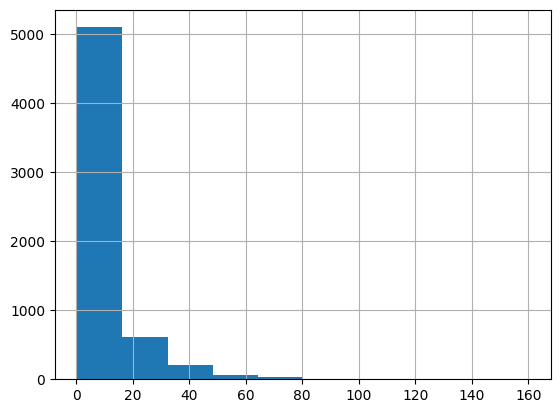

In [14]:
data['Price'].hist()
plt.show()

From the above we can see that,
- there are 1373 different prices for which car were sold.
- The highest number of car were sold for Rs. 4.5 lakh.
- the lowest selling price is 0.44 lakhs and highest selling price is 160 lakhs.
- The histogram shows the data distribution of the target variable is satisfactory to proceed further.



**Feature** **Engineering**:

Deriving new features from existing ones to imporve the performance of the model.

- In 'Mileage' column we need to remove units
- In 'Engine' column we remove CC units.
- 'Power' column we remove bhp units
- Making new features -
  
  Deriving Age of car from Year variable.

  Deriving Brand and Model of car from Name variable.

- Converting data types

Preprocessing Mileage

For fuel type and CNG and LPG Mileage is measured in km/kg where other type is measured in kmpl. Since those units are in km both of them so we need to convert them. We will drop the units.

here we are rstrip() function to remove caharcater from right side of the string.

In [15]:
data['Mileage'] = data['Mileage'].str.rstrip('kmpl')
data['Mileage'] = data['Mileage'].str.rstrip('km/kg')

In [16]:
data['Mileage'].value_counts().sort_index(ascending = True)

Mileage
0.0       68
10.0      10
10.1       7
10.13      3
10.2       6
          ..
9.52       2
9.7        1
9.74       2
9.8        4
9.9        3
Name: count, Length: 430, dtype: int64

There are zeros in values. Mileage can not be 0, so checking how many values are 0 to further treat them.

In [17]:
data['Mileage'] = data['Mileage'].astype('float')

In [18]:
data.query('Mileage == 0.0')['Mileage']

14      0.0
67      0.0
79      0.0
194     0.0
229     0.0
       ... 
5647    0.0
5875    0.0
5943    0.0
5972    0.0
6011    0.0
Name: Mileage, Length: 68, dtype: float64

We replace 0.0 values with nan values and handle them in missing values.


In [19]:
data.loc[data['Mileage'] == 0.0, 'Mileage'] = np.nan

In [20]:
data['Mileage'].isnull().sum()

70

**Preprocessing Engine**

Here we will drop unit 'CC'.

In [21]:
data['Engine'] = data['Engine'].str.rstrip('CC')

In [22]:
data['Engine'].value_counts().sort_index(ascending = True)

Engine
1047       4
1061      30
1086     108
1120      54
1150       7
        ... 
970        1
993       14
995       10
998      259
999       29
Name: count, Length: 146, dtype: int64

Preprocessing Power

We will drop unit bhp.

In [23]:
data['Power'] = data['Power'].str.rstrip('bhp')

In [24]:
data['Power'].value_counts().sort_index(ascending = True)

Power
100        55
100.6      39
101         4
102        57
102.5       8
         ... 
98.82       2
98.96       9
99         18
99.6        5
null      107
Name: count, Length: 372, dtype: int64

There are values which are null in Power column. We will replace those with nan so that we can handle them with missing values

In [25]:
data['Power'] = data['Power'].replace(regex = 'null', value = np.nan)

In [26]:
data['Power'].isna().sum()

143

**Preprocessing Seats**:


In [27]:
data['Seats'].unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.,  0.])

The seats column contain value 0 which can not be true. So we will change 0 to nan and we will handle them when handling missing values.

In [28]:
data.query('Seats == 0.0')['Seats']

3999    0.0
Name: Seats, dtype: float64

In [29]:
data['Seats'].isna().sum()

42

In [30]:
# replace 0 value with nan value and handle them with missing values
data.loc[3999, 'Seats'] = np.nan

In [31]:
data['Seats'].isna().sum()

43

**Making new features**

Deriving age feature from year feature.

Age of the car affects the price of used car. So we will derive Age feature from Year feature. We will add 2 new columns of Current_year and Age_of_car and Calculate the age of car by (current_year - year) and then we will drop current year and year columns from the dataset.

In [32]:
data['Current_year'] = 2024

In [33]:
data['Age_of_car'] = data['Current_year'] - data['Year']

In [34]:
# drop Current_year column
data.drop('Current_year', axis = 1, inplace = True)

**Deriving Brand and Model of car from Name variable**

Brand and model of the used car affects its price. So we will derive two new variable Brand and Model from Name feature. And the we will drop Name column.

In [35]:
# new dataframe with split value columns
new_df = data['Name'].str.split(" ", n = 1, expand = True)

In [36]:
new_df.head()

,0,1
0,Maruti,Wagon R LXI CNG
1,Hyundai,Creta 1.6 CRDi SX Option
2,Honda,Jazz V
3,Maruti,Ertiga VDI
4,Audi,A4 New 2.0 TDI Multitronic


In [37]:
# Making separate Brand column from new data frame
data['Brand'] = new_df[0]

# making separate Model column from new data frame
data['Model'] = new_df[1]

In [38]:
data.drop('Name', axis = 1, inplace = True)

In [39]:
# Check all unique values of brand
data['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

While Checking brand names, it can be see that 'Isuzu' and 'ISUZU' are same. Land must be 'Land Rover', and 'Mini' must be 'Mini Cooper'. So we need to correct these names.

In [42]:
data.loc[data.Brand == 'ISUZU', 'Brand'] = 'Isuzu'
data.loc[data.Brand == 'Land', 'Brand'] = 'Land Rover'
data.loc[data.Brand == 'Mini', 'Brand'] = 'Mini Cooper'

In [43]:
data['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land Rover', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini Cooper', 'Fiat',
       'Jeep', 'Smart', 'Ambassador', 'Isuzu', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [44]:
data['Brand'].nunique()

30

**Total 30 Brands of car**

In [45]:
low_class = ['Maruti', 'Hyundai', 'Honda', 'Toyota', 'Tata', 'Mitsubishi', 'Renault', 'Mahindra', 'Ford', 'Datsun', 'Chevrolet', 'Skoda', 'Fiat',
             'Smart', 'Ambassador', 'Isuzu', 'Force']

high_class = ['Audi', 'Nissan', 'Volkswagen', 'Land Rover', 'Mercedes-Benz', 'BMW', 'Porsche', 'Jaguar', 'Volvo', 'Mini Cooper', 'Jeep',
              'Bentley', 'Lamborghini']

print(len(low_class))
print(len(high_class))

17
13


Add new column Class_of_brand, define function class_of_brand which return low class and high class.

In [46]:
def class_of_brand(x):
  if x in low_class:
    return 'Low Class'
  else:
    return 'High Class'

In [47]:
data['Class_of_brand'] = data['Brand'].apply(lambda x : class_of_brand(x))
data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age_of_car,Brand,Model,Class_of_brand
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75,14,Maruti,Wagon R LXI CNG,Low Class
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50,9,Hyundai,Creta 1.6 CRDi SX Option,Low Class
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.7,5.0,4.50,13,Honda,Jazz V,Low Class
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,12,Maruti,Ertiga VDI,Low Class
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.8,5.0,17.74,11,Audi,A4 New 2.0 TDI Multitronic,High Class


**Converting Data Types**

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Year               6019 non-null   int64  
 2   Kilometers_Driven  6019 non-null   int64  
 3   Fuel_Type          6019 non-null   object 
 4   Transmission       6019 non-null   object 
 5   Owner_Type         6019 non-null   object 
 6   Mileage            5949 non-null   float64
 7   Engine             5983 non-null   object 
 8   Power              5876 non-null   object 
 9   Seats              5976 non-null   float64
 10  Price              6019 non-null   float64
 11  Age_of_car         6019 non-null   int64  
 12  Brand              6019 non-null   object 
 13  Model              6019 non-null   object 
 14  Class_of_brand     6019 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 705.5+ KB


Converting string object data type to category data type

In [49]:
data['Location'] = data['Location'].astype('category')
data['Fuel_Type'] = data['Fuel_Type'].astype('category')
data['Transmission'] = data['Transmission'].astype('category')
data['Owner_Type'] = data['Owner_Type'].astype('category')
data['Class_of_brand'] = data['Class_of_brand'].astype('category')

# converting numerica data type to float data type
data['Engine'] = data['Engine'].astype('float')
data['Power'] = data['Power'].astype('float')


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           6019 non-null   category
 1   Year               6019 non-null   int64   
 2   Kilometers_Driven  6019 non-null   int64   
 3   Fuel_Type          6019 non-null   category
 4   Transmission       6019 non-null   category
 5   Owner_Type         6019 non-null   category
 6   Mileage            5949 non-null   float64 
 7   Engine             5983 non-null   float64 
 8   Power              5876 non-null   float64 
 9   Seats              5976 non-null   float64 
 10  Price              6019 non-null   float64 
 11  Age_of_car         6019 non-null   int64   
 12  Brand              6019 non-null   object  
 13  Model              6019 non-null   object  
 14  Class_of_brand     6019 non-null   category
dtypes: category(5), float64(5), int64(3), object(2)
memory 

Data Cleaning:

- Identify and delete columns that contain single value i.e. no variance
- Consider and remove columns that have very few values i.e. low variance
- Identify and delete rows that contain duplicate data.
- Outlier detection and outliers handling
- Missing value handling

**1. Identify and delete columns that contain single value i.e. no variance**

In [51]:
columns_with_no_variance = [ ]
for col in data.columns:
  if len(data[col].unique()) == 1:
    columns_with_no_variance.append(col)
    data.drop([col], axis = 1, inplace = True)

print(columns_with_no_variance)
print(data.shape)

[]
(6019, 15)


**Hence there is no column that contain single value i.e. no variance.**

**2. Consider and remove columns that have very few values i.e. low variance**

In [52]:
data_numerical_columns = ['Kilometers_Driven', 'Mileage','Engine', 'Power', 'Age_of_car' ]
columns_with_low_variance = [ ]
for col in data_numerical_columns:
  if data[col].var() <= 0.5:
    columns_with_low_variance.append(col)
    data.drop([col], axis = 1, inplace = True)

print(columns_with_low_variance)
print(data.shape)

[]
(6019, 15)


**Hence there is no any numerical column that contain low values i.e. low variance.**

**3. Identify and delete rows that contain duplicate data.**

In [53]:
duplicate_rows = data.duplicated()
print(duplicate_rows.any())

data.drop_duplicates(inplace = True)
print(data.shape)

False
(6019, 15)


**Hence there is no any duplicated data in dataframe.**

**4. Outlier detection and outliers handling**


In this dataset, there are 5 numerical predictors viz. Kilometers_Driven, Mileage, Engine, Power, Age_of_car.

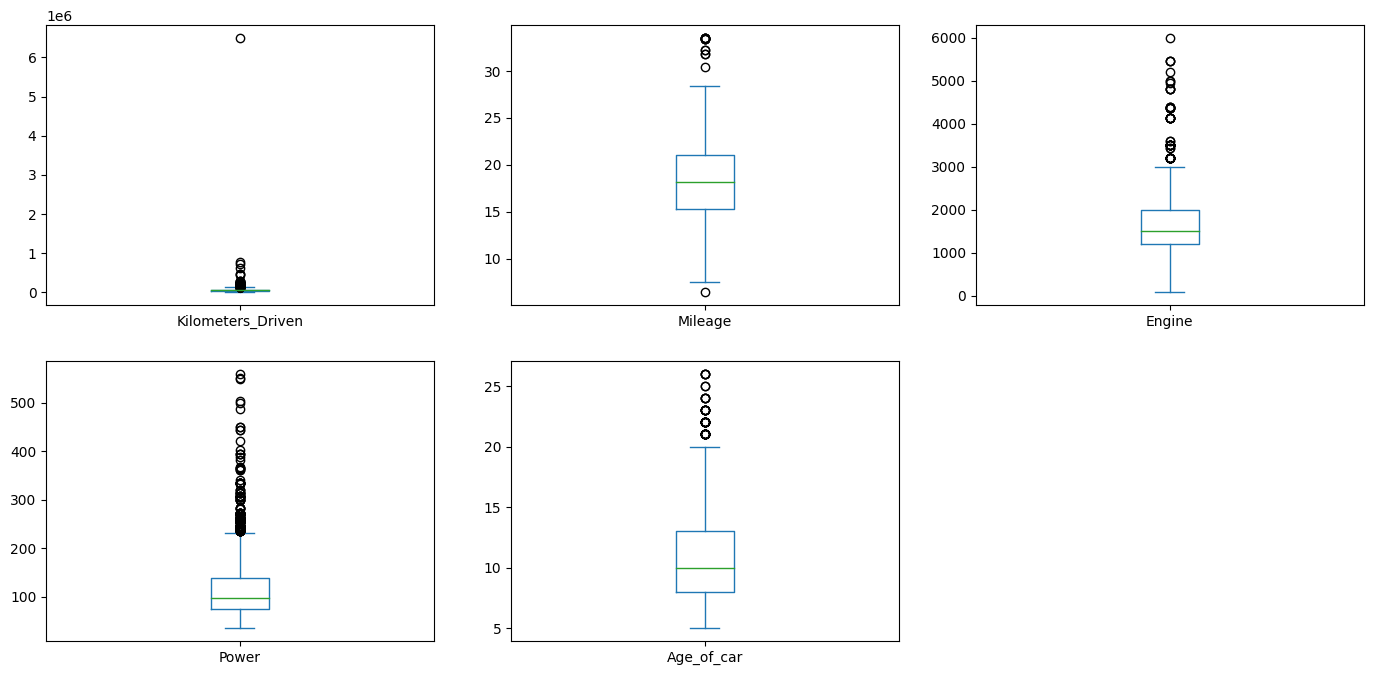

In [54]:
# draw boxplot
data[['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Age_of_car']].plot(kind = 'box', subplots = True, layout = (2,3),
                                                                             figsize = (17,8))
plt.show()

In [55]:
# Find number of outliers in each numerical columns.
data_numerical_columns = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Age_of_car']
for column in data_numerical_columns:
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5*IQR
  upper = Q3 + 1.5*IQR

  outliers = [x for x in data[column] if x < lower or x > upper]

  print(column)
  print('Number of outliers : ', len(outliers))
  print('-'*35)

Kilometers_Driven
Number of outliers :  202
-----------------------------------
Mileage
Number of outliers :  15
-----------------------------------
Engine
Number of outliers :  61
-----------------------------------
Power
Number of outliers :  238
-----------------------------------
Age_of_car
Number of outliers :  50
-----------------------------------


In [56]:
# draw Skewness before outlier treatment
data_numerical_columns = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Age_of_car']
for column in data_numerical_columns:
  print('Skewness of', column, 'before_outlier_treatment ', data[column].skew())

Skewness of Kilometers_Driven before_outlier_treatment  58.72466188582937
Skewness of Mileage before_outlier_treatment  0.21068656169715658
Skewness of Engine before_outlier_treatment  1.421473940493876
Skewness of Power before_outlier_treatment  1.916480719635821
Skewness of Age_of_car before_outlier_treatment  0.8458021355295817


In [57]:
# find Maximum value before outlier treatment
data_numerical_columns = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Age_of_car']
for column in data_numerical_columns:
  print('Maximum value in ', column, 'before outlier treatment: ', data[column].max())

Maximum value in  Kilometers_Driven before outlier treatment:  6500000
Maximum value in  Mileage before outlier treatment:  33.54
Maximum value in  Engine before outlier treatment:  5998.0
Maximum value in  Power before outlier treatment:  560.0
Maximum value in  Age_of_car before outlier treatment:  26


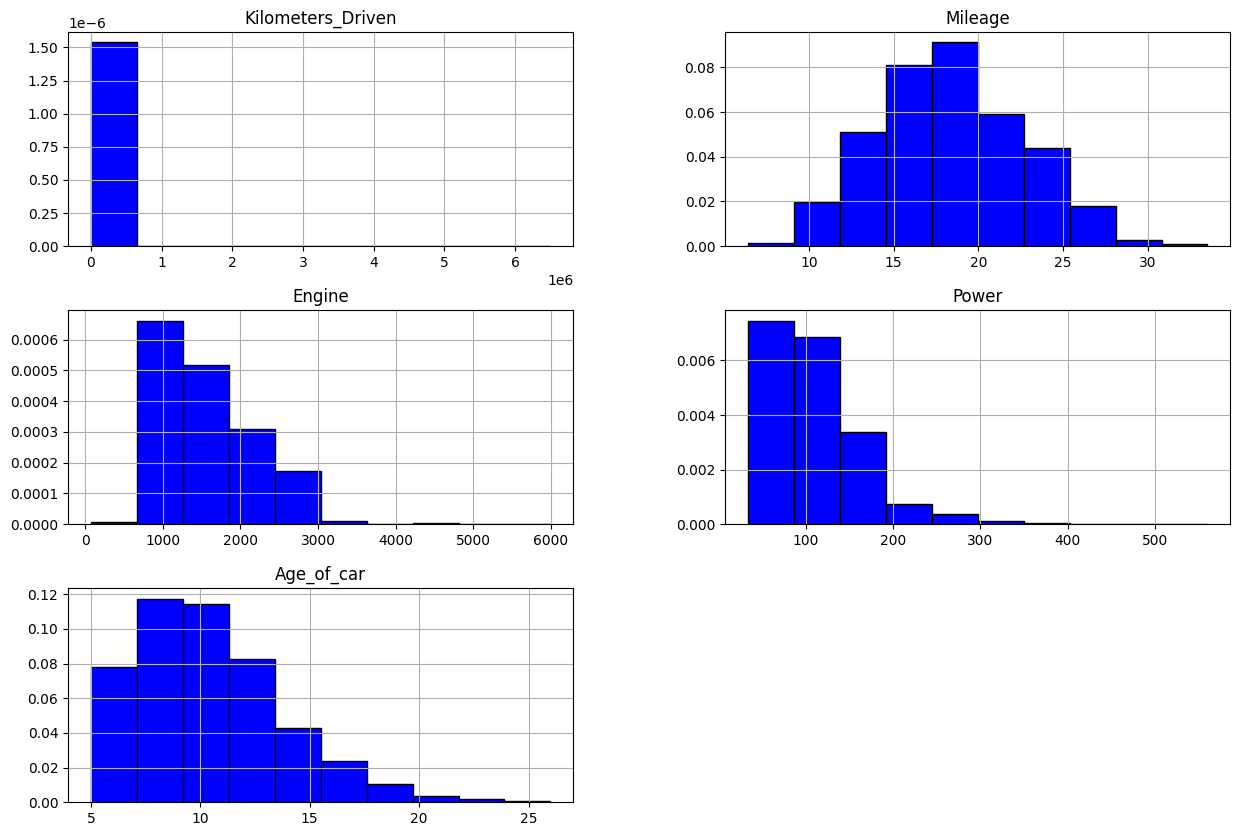

In [58]:
data[['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Age_of_car']].hist(figsize = (15, 10), color = 'blue', density = True,
                                                                             edgecolor = 'black')
plt.show()

From the above result we can observed that, skewness and histogram of numerical columns we need to treat outliers in Kilometers_Driven column only. And in Other features, the distribution of data is good.

**Handling Outliers in Kilometers_Driven**

In [59]:
# get highest values from
data['Kilometers_Driven'].sort_values(ascending = False)

2328    6500000
340      775000
1860     720000
358      620000
3092     480000
         ...   
1242       1000
173        1000
2646       1000
5606        600
1361        171
Name: Kilometers_Driven, Length: 6019, dtype: int64

There is one outlier 6500000 which is far away from the remaining values. We will replace it with the nearest value.

In [60]:
data['Kilometers_Driven'][data['Kilometers_Driven'] == 6500000 ] = 775000

In [61]:
data['Kilometers_Driven'].sort_values(ascending = False)

340     775000
2328    775000
1860    720000
358     620000
3092    480000
         ...  
1242      1000
173       1000
2646      1000
5606       600
1361       171
Name: Kilometers_Driven, Length: 6019, dtype: int64

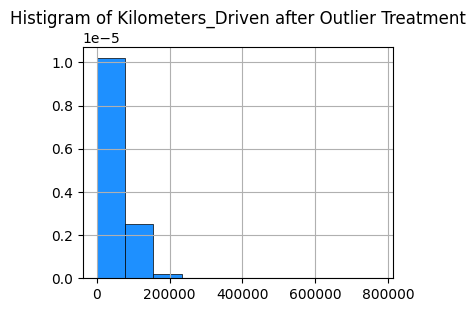

In [62]:
data['Kilometers_Driven'].hist (color = 'dodgerblue', density = True, edgecolor = 'black', linewidth = 0.5, figsize = (4, 3))
plt.title('Histigram of Kilometers_Driven after Outlier Treatment')
plt.show()

In [63]:
print('Skewness of Kilometers_Driven after outlier treatment', data['Kilometers_Driven'].skew())

Skewness of Kilometers_Driven after outlier treatment 4.88150701252247


**5. Missing value handling**

In [64]:
data.isnull().sum()

Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage               70
Engine                36
Power                143
Seats                 43
Price                  0
Age_of_car             0
Brand                  0
Model                  0
Class_of_brand         0
dtype: int64

There are 4 features where values are missing

1. Mileage, Engine, Power are numerical features, so we will use median of the same model to fill the missing values.

2. Seats is a categorical variable, we will fill the missing values based on the seats available in the same model.

**Handling missing data in Mileage column**

The Mileage of the car is affected by the name of the car. So we will use these variables while imputing missing values of Mileage.

In [65]:
data['Mileage'].isna().sum()

70

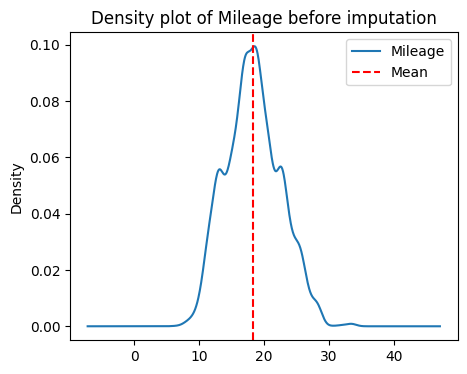

In [66]:
# plot density plot of Mileage before imputation
data['Mileage'].plot(kind = 'density', figsize = (5,4))
plt.title('Density plot of Mileage before imputation')
plt.axvline(x = data['Mileage'].mean(), color = 'red', linestyle = '--', label = 'Mean')
plt.legend()
plt.show()

In [67]:
skewness_of_mileage_with_missing_values = data['Mileage'].skew()

In [70]:
data['Mileage'] = data.groupby(['Brand', 'Year'], group_keys = False)['Mileage'].apply(lambda x: x.fillna(x.median()))

In [71]:
data['Mileage'].isna().sum()

9

In [72]:
data['Mileage'] = data['Mileage'].fillna(data['Mileage'].median())

In [73]:
data['Mileage'].isna().sum()

0

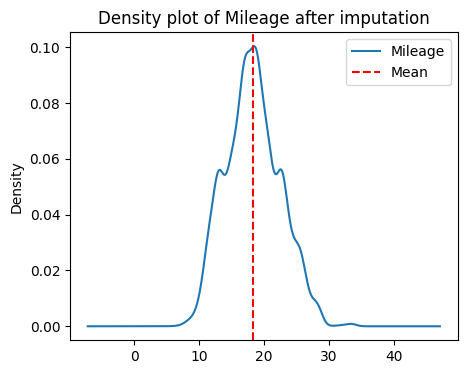

In [74]:
#plot density plot of Mileage before imputation
data['Mileage'].plot(kind = 'density', figsize = (5,4))
plt.title('Density plot of Mileage after imputation')
plt.axvline(x = data['Mileage'].mean(), color = 'red', linestyle = '--', label = 'Mean')
plt.legend()
plt.show()

In [75]:
skewness_of_mileage_without_missing_values = data['Mileage'].skew()

In [76]:
print('Skewness of Mileage with missing values: ', skewness_of_mileage_with_missing_values)
print('Skewness of Mileage without missing values: ', skewness_of_mileage_without_missing_values)

Skewness of Mileage with missing values:  0.21068656169715658
Skewness of Mileage without missing values:  0.21831662523384332


From the above result we can see that, density plots of Mileage column before and after imputation, there is not much change in the shapes of density curves. This can be confirmed with skewness value. Hence we can finalise the imputation.

**Handling missing values in Engine column**

The Engine capacity of the car is affected by the Name of car and manufacturing year of the car. So we will use these variables while imputing missing values of Engine.

In [77]:
data['Engine'].isna().sum()

36

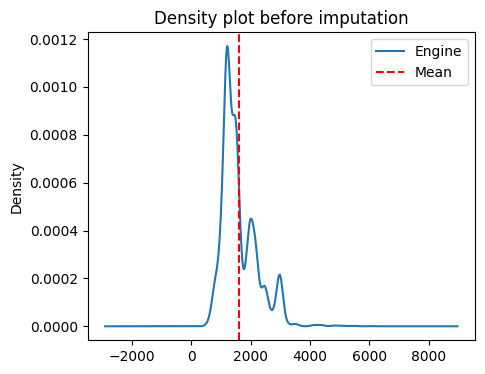

In [78]:
data['Engine'].plot(kind = 'density', figsize = (5,4))
plt.title('Density plot before imputation')
plt.axvline(x = data['Engine'].mean(), color = 'red', linestyle = '--', label = 'Mean')
plt.legend()
plt.show()

In [79]:
skewness_of_engine_with_missing_values = data['Engine'].skew()

In [80]:
data['Engine'] = data.groupby(['Brand', 'Year'], group_keys = False)['Engine'].apply(lambda x: x.fillna(x.median()))

In [81]:
data['Engine'].isna().sum()

5

In [82]:
data['Engine'] = data['Engine'].fillna(data['Engine'].median())

In [83]:
data['Engine'].isna().sum()

0

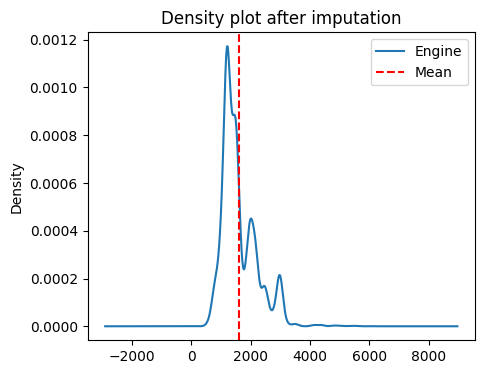

In [84]:
data['Engine'].plot(kind = 'density', figsize = (5,4))
plt.title('Density plot after imputation')
plt.axvline(x = data['Engine'].mean(), color = 'red', linestyle = '--', label = 'Mean')
plt.legend()
plt.show()

In [85]:
skewness_of_engine_without_missing_values = data['Engine'].skew()

In [86]:
print('Skewness of engine with missing values: ', skewness_of_engine_with_missing_values)
print('Skewness of engine without missing values: ', skewness_of_engine_without_missing_values)

Skewness of engine with missing values:  1.421473940493876
Skewness of engine without missing values:  1.424456606760127


From the above results we can show that, density plots of Engine column before and after imputation, there is not much change in the shapes of density curves. This can be confirmed with skewness value. Hence we can finalise the imputation.

Handling missing data in Power column

The power of the car is affected by the brand of the car and year of the car So we will use these variables while imputing missing values of power.

In [87]:
data['Power'].isna().sum()

143

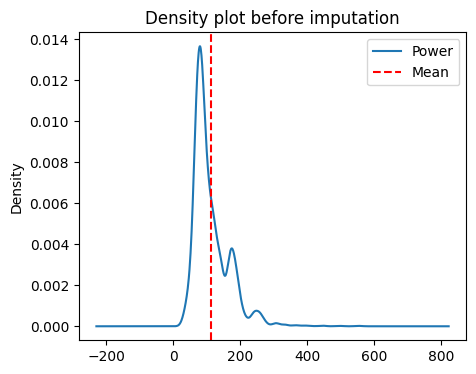

In [88]:
data['Power'].plot(kind = 'density', figsize = (5,4))
plt.title('Density plot before imputation')
plt.axvline(x = data['Power'].mean(), color = 'red', linestyle = '--', label = 'Mean')
plt.legend()
plt.show()

In [89]:
skewness_of_power_with_missing_values = data['Power'].skew()

In [90]:
data['Power'] = data.groupby(['Brand', 'Year'], group_keys= False)['Power'].apply(lambda x : x.fillna(x.median()))

In [91]:
data['Power'].isna().sum()

16

In [92]:
data['Power'] = data['Power'].fillna(data['Power'].median())

In [93]:
data['Power'].isna().sum()

0

In [94]:
skewness_of_power_without_missing_values = data['Power'].skew()

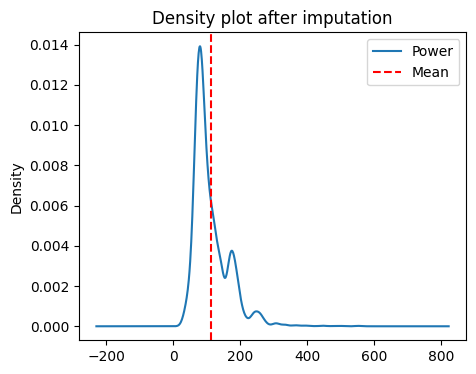

In [95]:
data['Power'].plot(kind = 'density', figsize = (5,4))
plt.title('Density plot after imputation')
plt.axvline(x = data['Power'].mean(), color = 'red', linestyle = '--', label = 'Mean')
plt.legend()
plt.show()

In [96]:
print('Skewness of Power With missing values: ', skewness_of_power_with_missing_values)
print('Skewness of power without missing values: ', skewness_of_power_without_missing_values)

Skewness of Power With missing values:  1.916480719635821
Skewness of power without missing values:  1.9631314654502376


From the above result we can see that, density plots of Power column before and after imputation, there is not much change in the shapes of density curves. This can be confirmed with skewness value. Hence we can finalise the imputation.

**Handling missing data in Seats Column**

The number of seats dependent upan the name or brand name of the car, so we are impute the missing values based on brand name.

In [97]:
data['Seats'].isna().sum()

43

In [98]:
data['Seats'] = data.groupby(['Brand'], group_keys= False)['Seats'].apply(lambda x: x.fillna(x.mode()))

In [99]:
data['Seats'].isna().sum()

43

Majority of the cars are 5 seaters. So we will fill missing values with 5.

In [100]:
data['Seats'] = data['Seats'].fillna(5)

In [101]:
data['Seats'].isna().sum()

0

In [102]:
data.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Age_of_car           0
Brand                0
Model                0
Class_of_brand       0
dtype: int64

**All the missing values are removed and filled.**

**Exploratory Data Analysis**

1. Descriptive Statistics

In [103]:
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Location,6019,11,Mumbai,790,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,6019.0,NaN,NaN,NaN,2013.358199,3.269742,1998.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,6019.0,NaN,NaN,NaN,57787.225619,38987.869044,171.0,34000.0,53000.0,73000.0,775000.0
Fuel_Type,6019,5,Diesel,3205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,6019,2,Manual,4299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,6019,4,First,4929,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,6019.0,NaN,NaN,NaN,18.321004,4.164378,6.4,15.3,18.19,21.1,33.54
Engine,6019.0,NaN,NaN,NaN,1620.382871,600.283283,72.0,1198.0,1493.0,1984.0,5998.0
Power,6019.0,NaN,NaN,NaN,112.781779,53.695196,34.2,75.0,93.7,138.1,560.0
Seats,6019.0,NaN,NaN,NaN,5.277621,0.803479,2.0,5.0,5.0,5.0,10.0


2. Correlation between Target and Continuous variable

In [104]:
correlation_variables = ['Price', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Age_of_car']
for feature in correlation_variables:
  print(feature)
  correlation_result = data['Price'].corr(data[feature])
  print('Correlation between Price and ', feature, ':', correlation_result)


Price
Correlation between Price and  Price : 1.0
Kilometers_Driven
Correlation between Price and  Kilometers_Driven : -0.1479912903887113
Mileage
Correlation between Price and  Mileage : -0.3314992294479024
Engine
Correlation between Price and  Engine : 0.6575206980476338
Power
Correlation between Price and  Power : 0.770986502978132
Seats
Correlation between Price and  Seats : 0.053787424028546534
Age_of_car
Correlation between Price and  Age_of_car : -0.30532740836134836


1. Negative Correlation:

  Negative correlation between Price and Kilometers_Driven, Mileage and Age_of_car. As one increases, other decreases.

2. Positive correlation:

  There is a positive correlation between Price and Engine, Power and Seats. As one increases, other also increases.

**3. Skewness of Data**

In [105]:
numerical_variables = ['Price', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Age_of_car']
for feature in numerical_variables:
  print(feature, ':', data[feature].skew())

Price : 3.3352319876668415
Kilometers_Driven : 4.88150701252247
Mileage : 0.21831662523384332
Engine : 1.424456606760127
Power : 1.9631314654502376
Seats : 1.9107036119186807
Age_of_car : 0.8458021355295817


Thumb rule said that,

1. if the skewness is between -0.5 and 0.5, the data are nearly symmetrical.
2. if the skewness is between -1 and -0.5 (negative skewed) or between 0.5 and 1 (positive skewed), the data are slightly skewed.
3. if the skewness is lower than -1 (negative skewed) the data are extremly skewed.

Here,
1. The skewness between Price, Kilometers_Driven, Engine, Power and seats are greater than  hence data are extremely skewed.
2. the skewness between age_of_car is 0.5 and 1 means data are positively skewed.

**4. Kurtosis of data**

In [106]:
numerical_variables = ['Price', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Age_of_car']
for feature in numerical_variables:
  print(feature, ':', data[feature].kurtosis())

Price : 17.09220197043644
Kilometers_Driven : 66.46724235436773
Mileage : -0.26727693069562797
Engine : 3.1281188870937835
Power : 6.817168407688916
Seats : 4.383215060515923
Age_of_car : 0.8942008849831131


Thumb rule said that,

1. if the kurtosis is greater than +2, then the distribution is too picked.
2. A kurtosis of less than -2 indicates a distribution that is too flat.
3. When the kurtosis is close to 0, the pattern of responses is considered a normal distribution.

Here,

1. The kurtosis of Kilometers driven, Engine, Power, Seats and Price is more than +2, hence the distribution is too peaked.
2. The kurtosis of age of car is between +2 and -2, hence the distribution is flat.
3. The kurtosis of milage is near to 0, hence the distribution is normal.

**5. Data Visualization**

Univariate Plots

Histogram of Continuous features: Year, Kilometers_Driven, Mileage, Engine, Power, Age_of_car

In [107]:
def histograms_plot(Data, features, rows, cols):
    fig = plt.figure(figsize=(15,8))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        data[feature].hist(density = True, ax=ax, color = 'pink', edgecolor = 'black' )
        ax.set_title(feature)
        plt.axvline(x = data[feature].mean(), color='red', linestyle='--', label='Mean')
        plt.axvline(x = data[feature].median(), color='green', linestyle='--', label='Median')
        plt.legend()
    fig.tight_layout()
    plt.show()

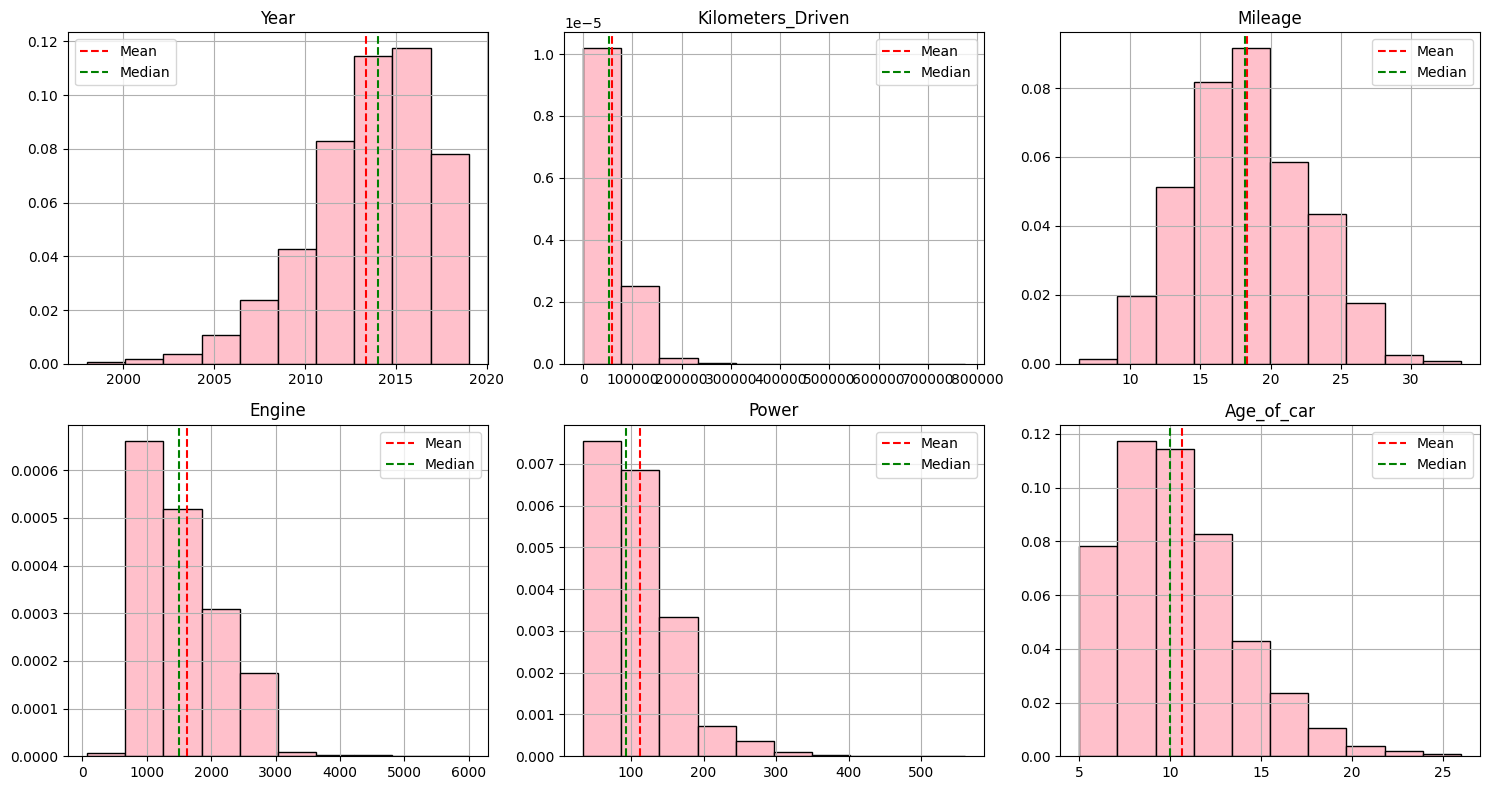

In [108]:
Continuous_features = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Age_of_car']
histograms_plot(data, Continuous_features, 2,3)

From the above graph we can see that,
- For Year feature Mean < Median, hence they are negatively skewed.
- Kilometers_Driven are heavily skewed.
- For Mileage feature, Mean and Median are almost equal. The Mileage of the sales car is between 15 and 20.
- For Engine feature, Median < Mean, hence positively skewed. Most of the acrs have Engine between 1000 CC and 2000 CC.
- For Power feature, Median < Mean, hence positively skewed. Most of the cars of engine power is between 50 to 150 bhp.
- For Age_of_car feature, Median < Mean, hence positively skewed. Most of the cars have age between 6 to 10 years.


Countplot for categorical feature

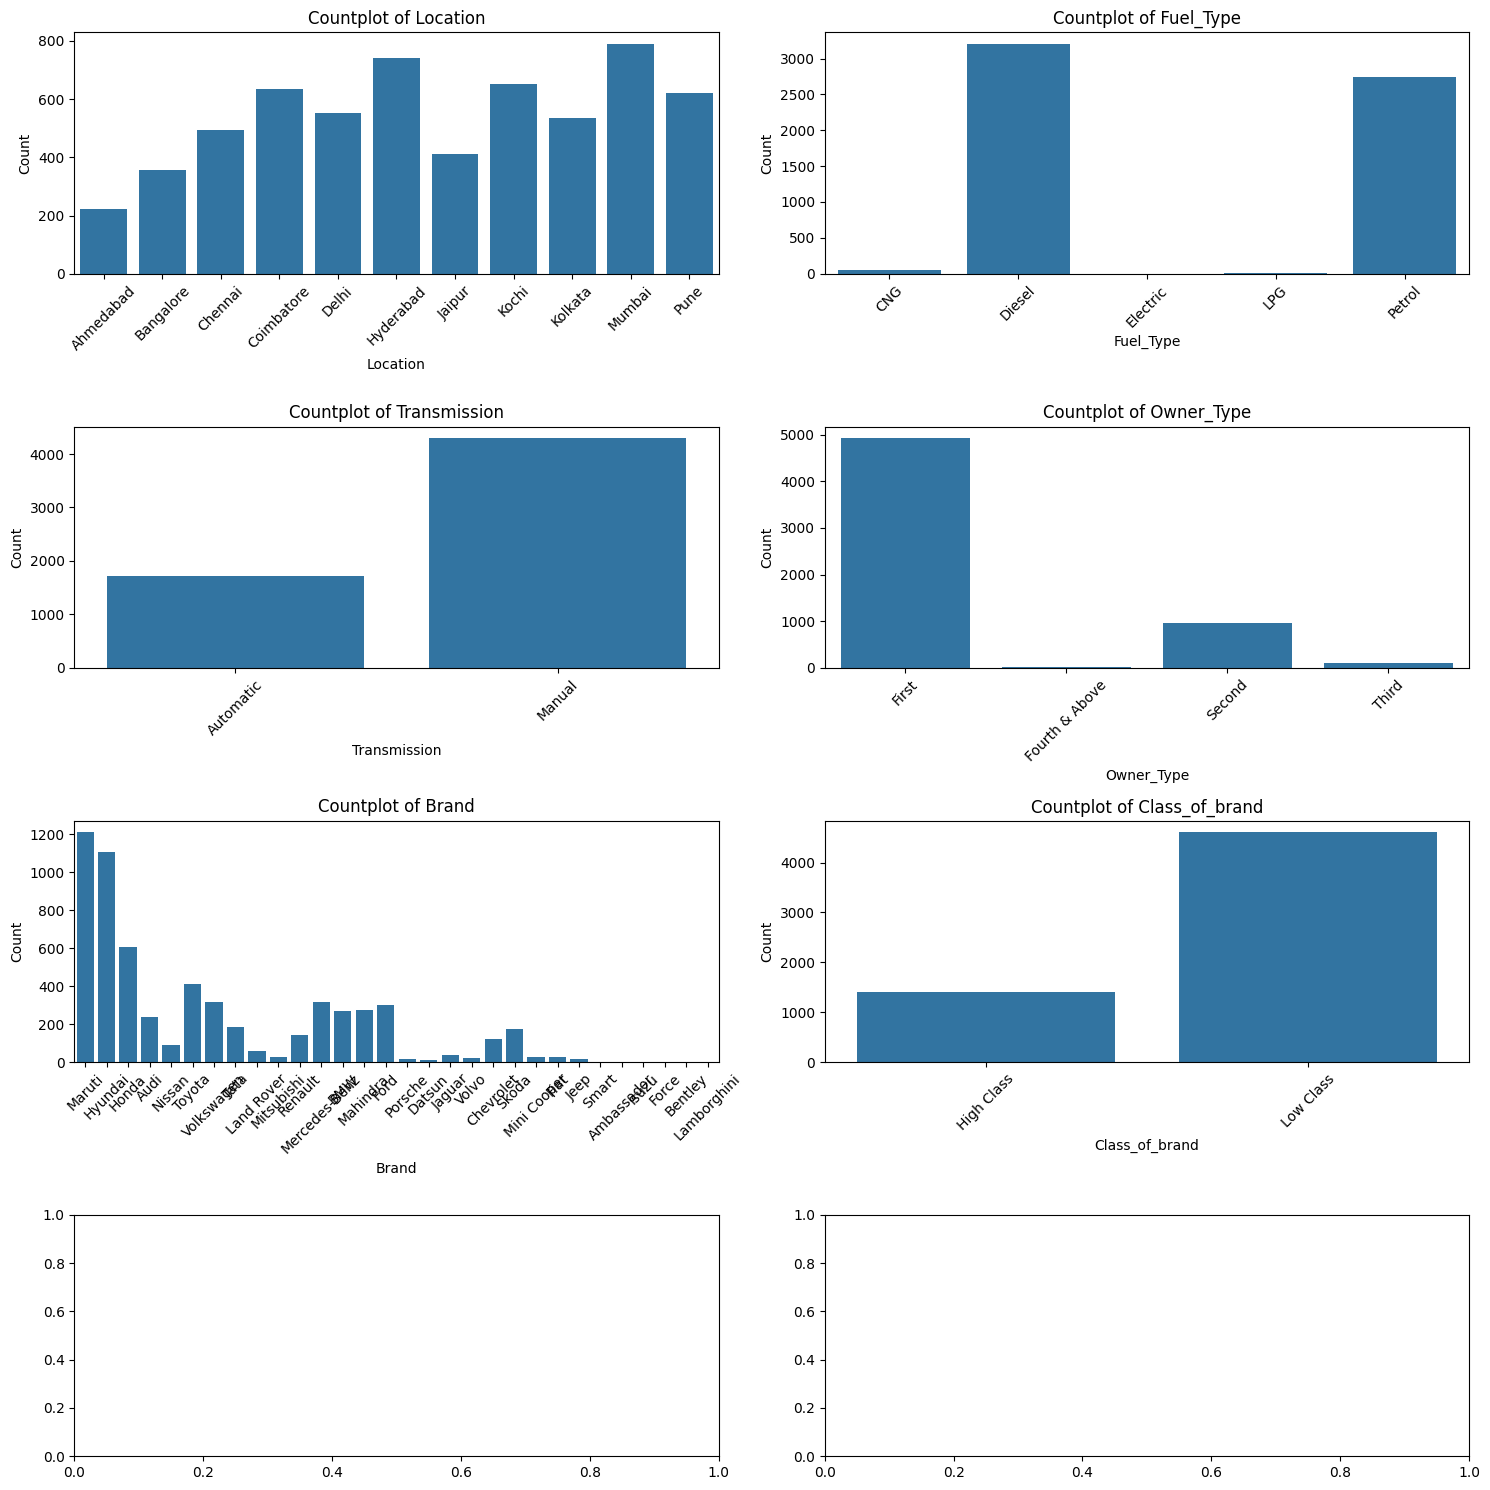

In [109]:
categorical_features = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand', 'Class_of_brand']

fig, axes = plt.subplots(4, 2, figsize = (15, 15))
axes = axes.flatten()

# looping through each categorical feature and create countplot
for i, feature in enumerate(categorical_features):

  sns.countplot(x = feature, data = data, ax = axes[i])
  axes[i].set_title(f'Countplot of {feature}')
  axes[i].set_xlabel(feature)
  axes[i].set_ylabel('Count')
  axes[i].tick_params(axis = 'x', rotation = 45)

plt.tight_layout()
plt.show()

From the above graph we can see that,

- Most of the cars selling in Mumbai.
- Most of the seeling cars are diesel car.
- maruti is the top most selling brand and whereas lamborghini is lowest selling brand.
- most of the cars are low-class car.


Understanding the relationship between Price and Continuous variables i.e. Kilometers_Driven, Mileage, Engine, Power. Age_of_car.

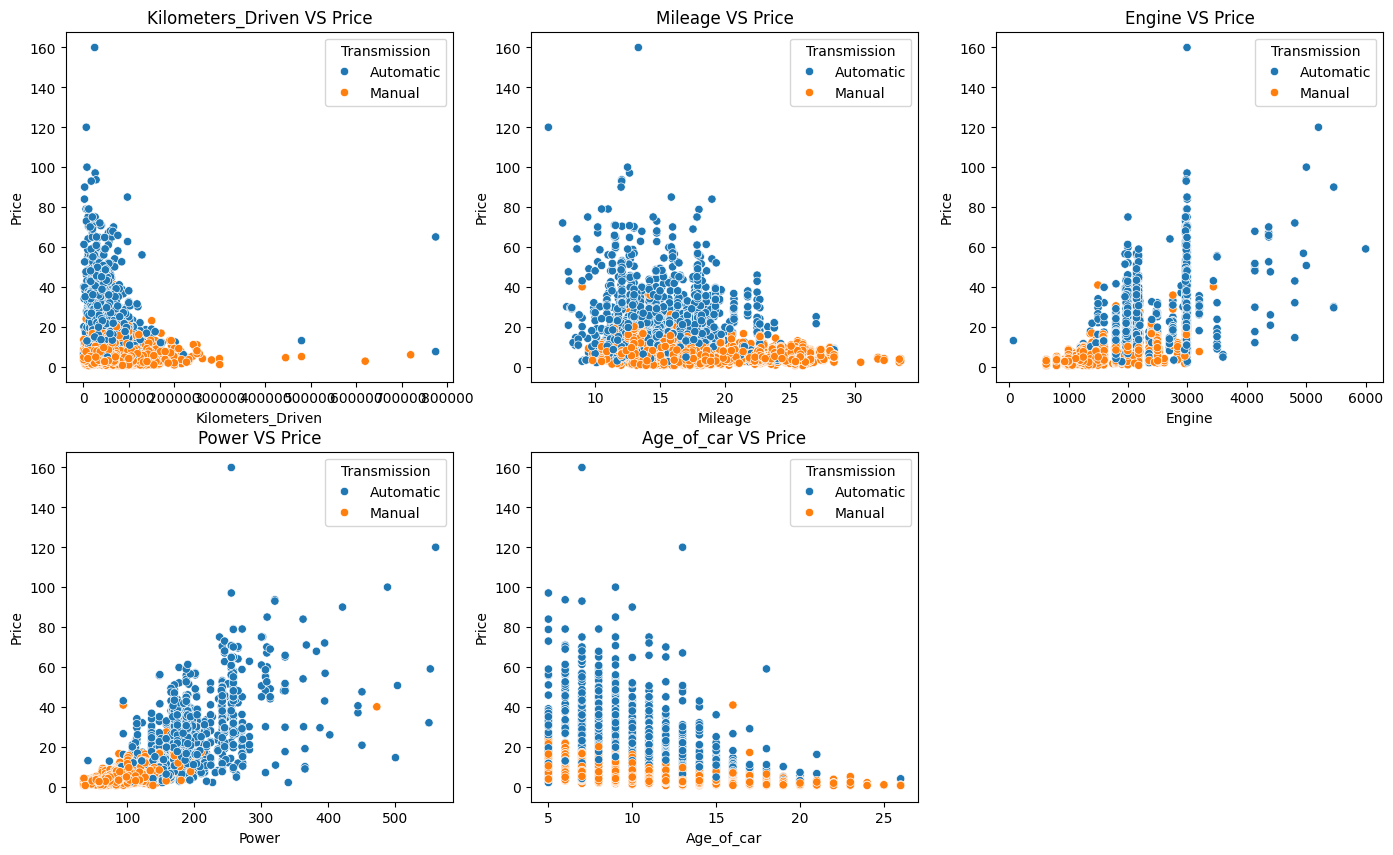

In [110]:
continuous_features = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Age_of_car']

fig = plt.figure(figsize = (17, 10))

for feature, i in zip(continuous_features, range(6)):
  ax = plt.subplot(2, 3, i+1)

  plot = sns.scatterplot(data = data, x = feature, y = 'Price', ax = ax, hue = data['Transmission'])

  plot.set_title(feature + ' VS ' + 'Price')
  plot.set_xlabel(feature)
  plot.set_ylabel('Price')

plt.show()

Understanding the relationship between Price and Categorical variables

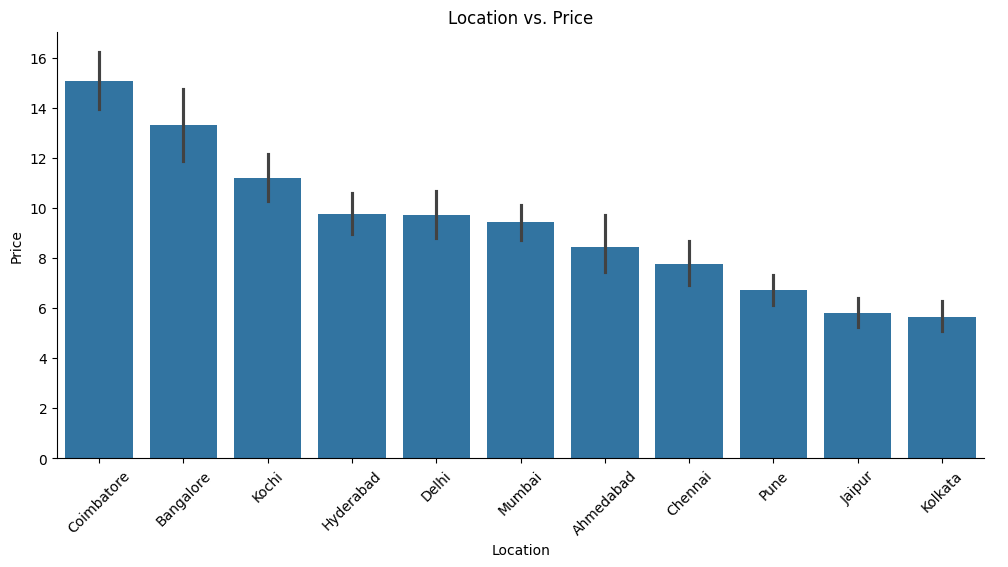

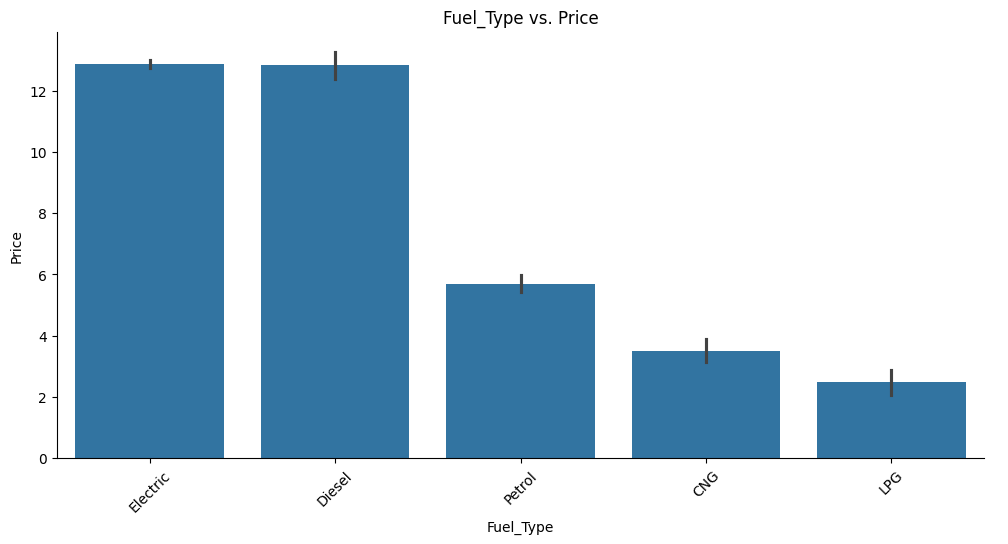

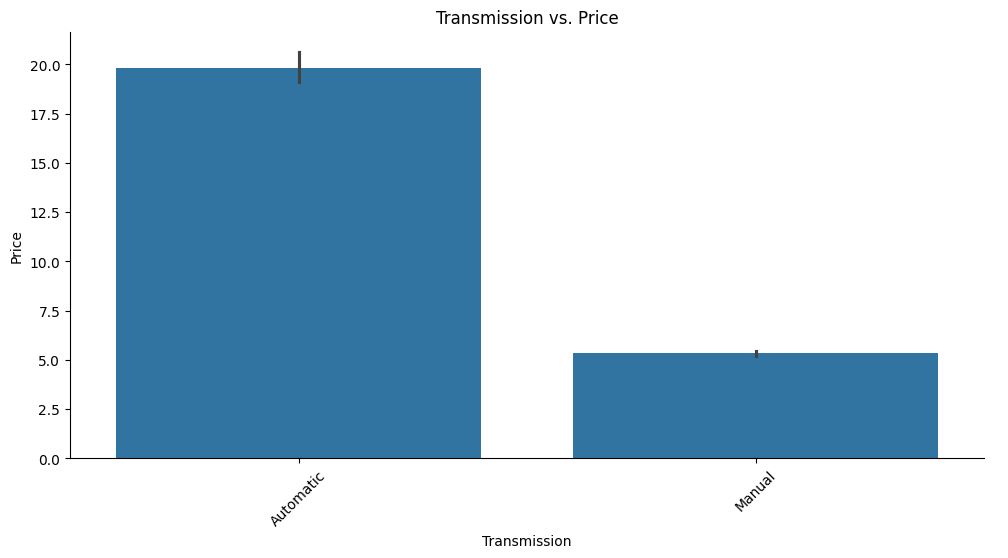

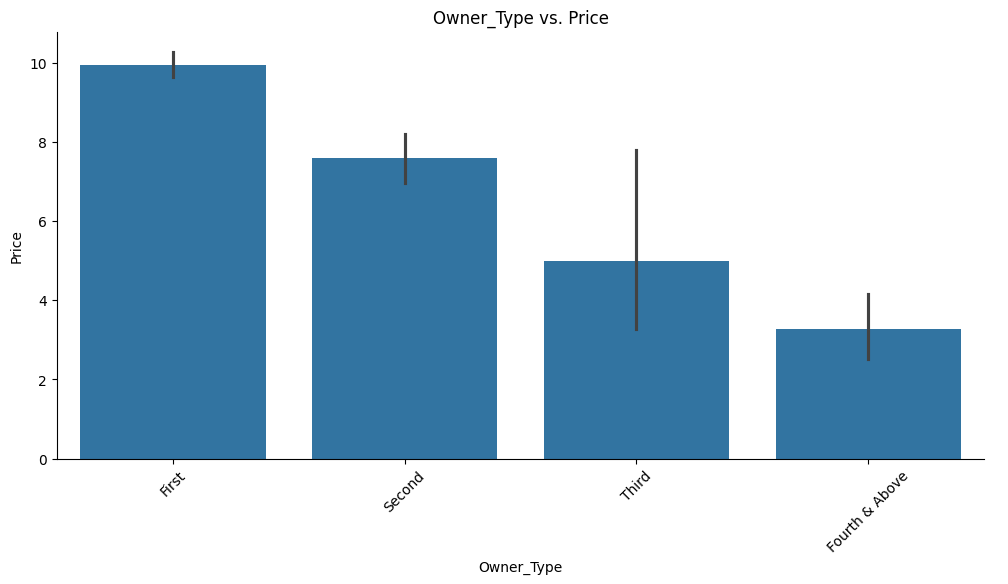

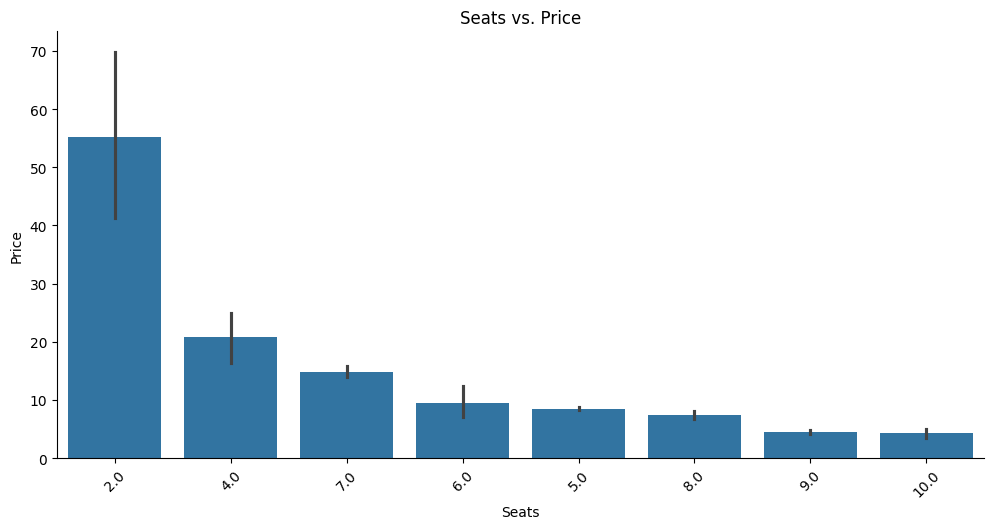

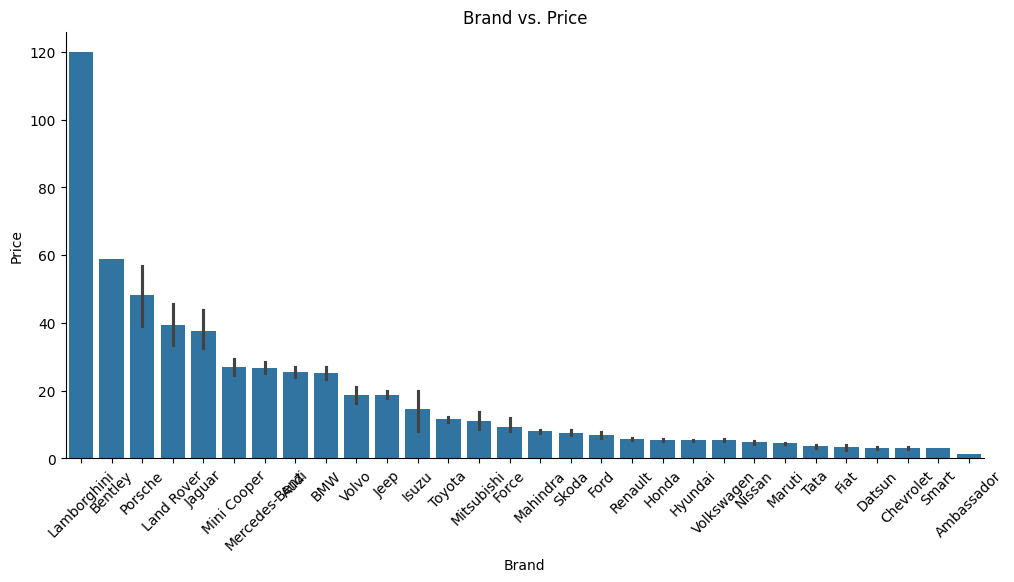

In [111]:
categorical_features = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats', 'Brand' ]


for feature in categorical_features:
    order=data.groupby([feature])['Price'].mean().sort_values(ascending= False).index
    sns.catplot(x = feature, y = 'Price', data = data, kind='bar', order = order,  height = 5, aspect = 2)
    plt.title(f'{feature} vs. Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.show()

From the above we can see that,

Used cars are costly in Coimbatore whereas those are cheap in Kolkata.

Diesel care are costly whereas LPG cars are cheapest.

Automatic cars are expensive compared to mannual cars.

customers are ready to pay more for first owned cars.

Two seater cars are the most expensive cars.

Lamborghini is the expensive brand whereas Ambassador is the cheapest brand.

As expected, high-class cars are expensive

Multivariate Plots

1. Pair Plot

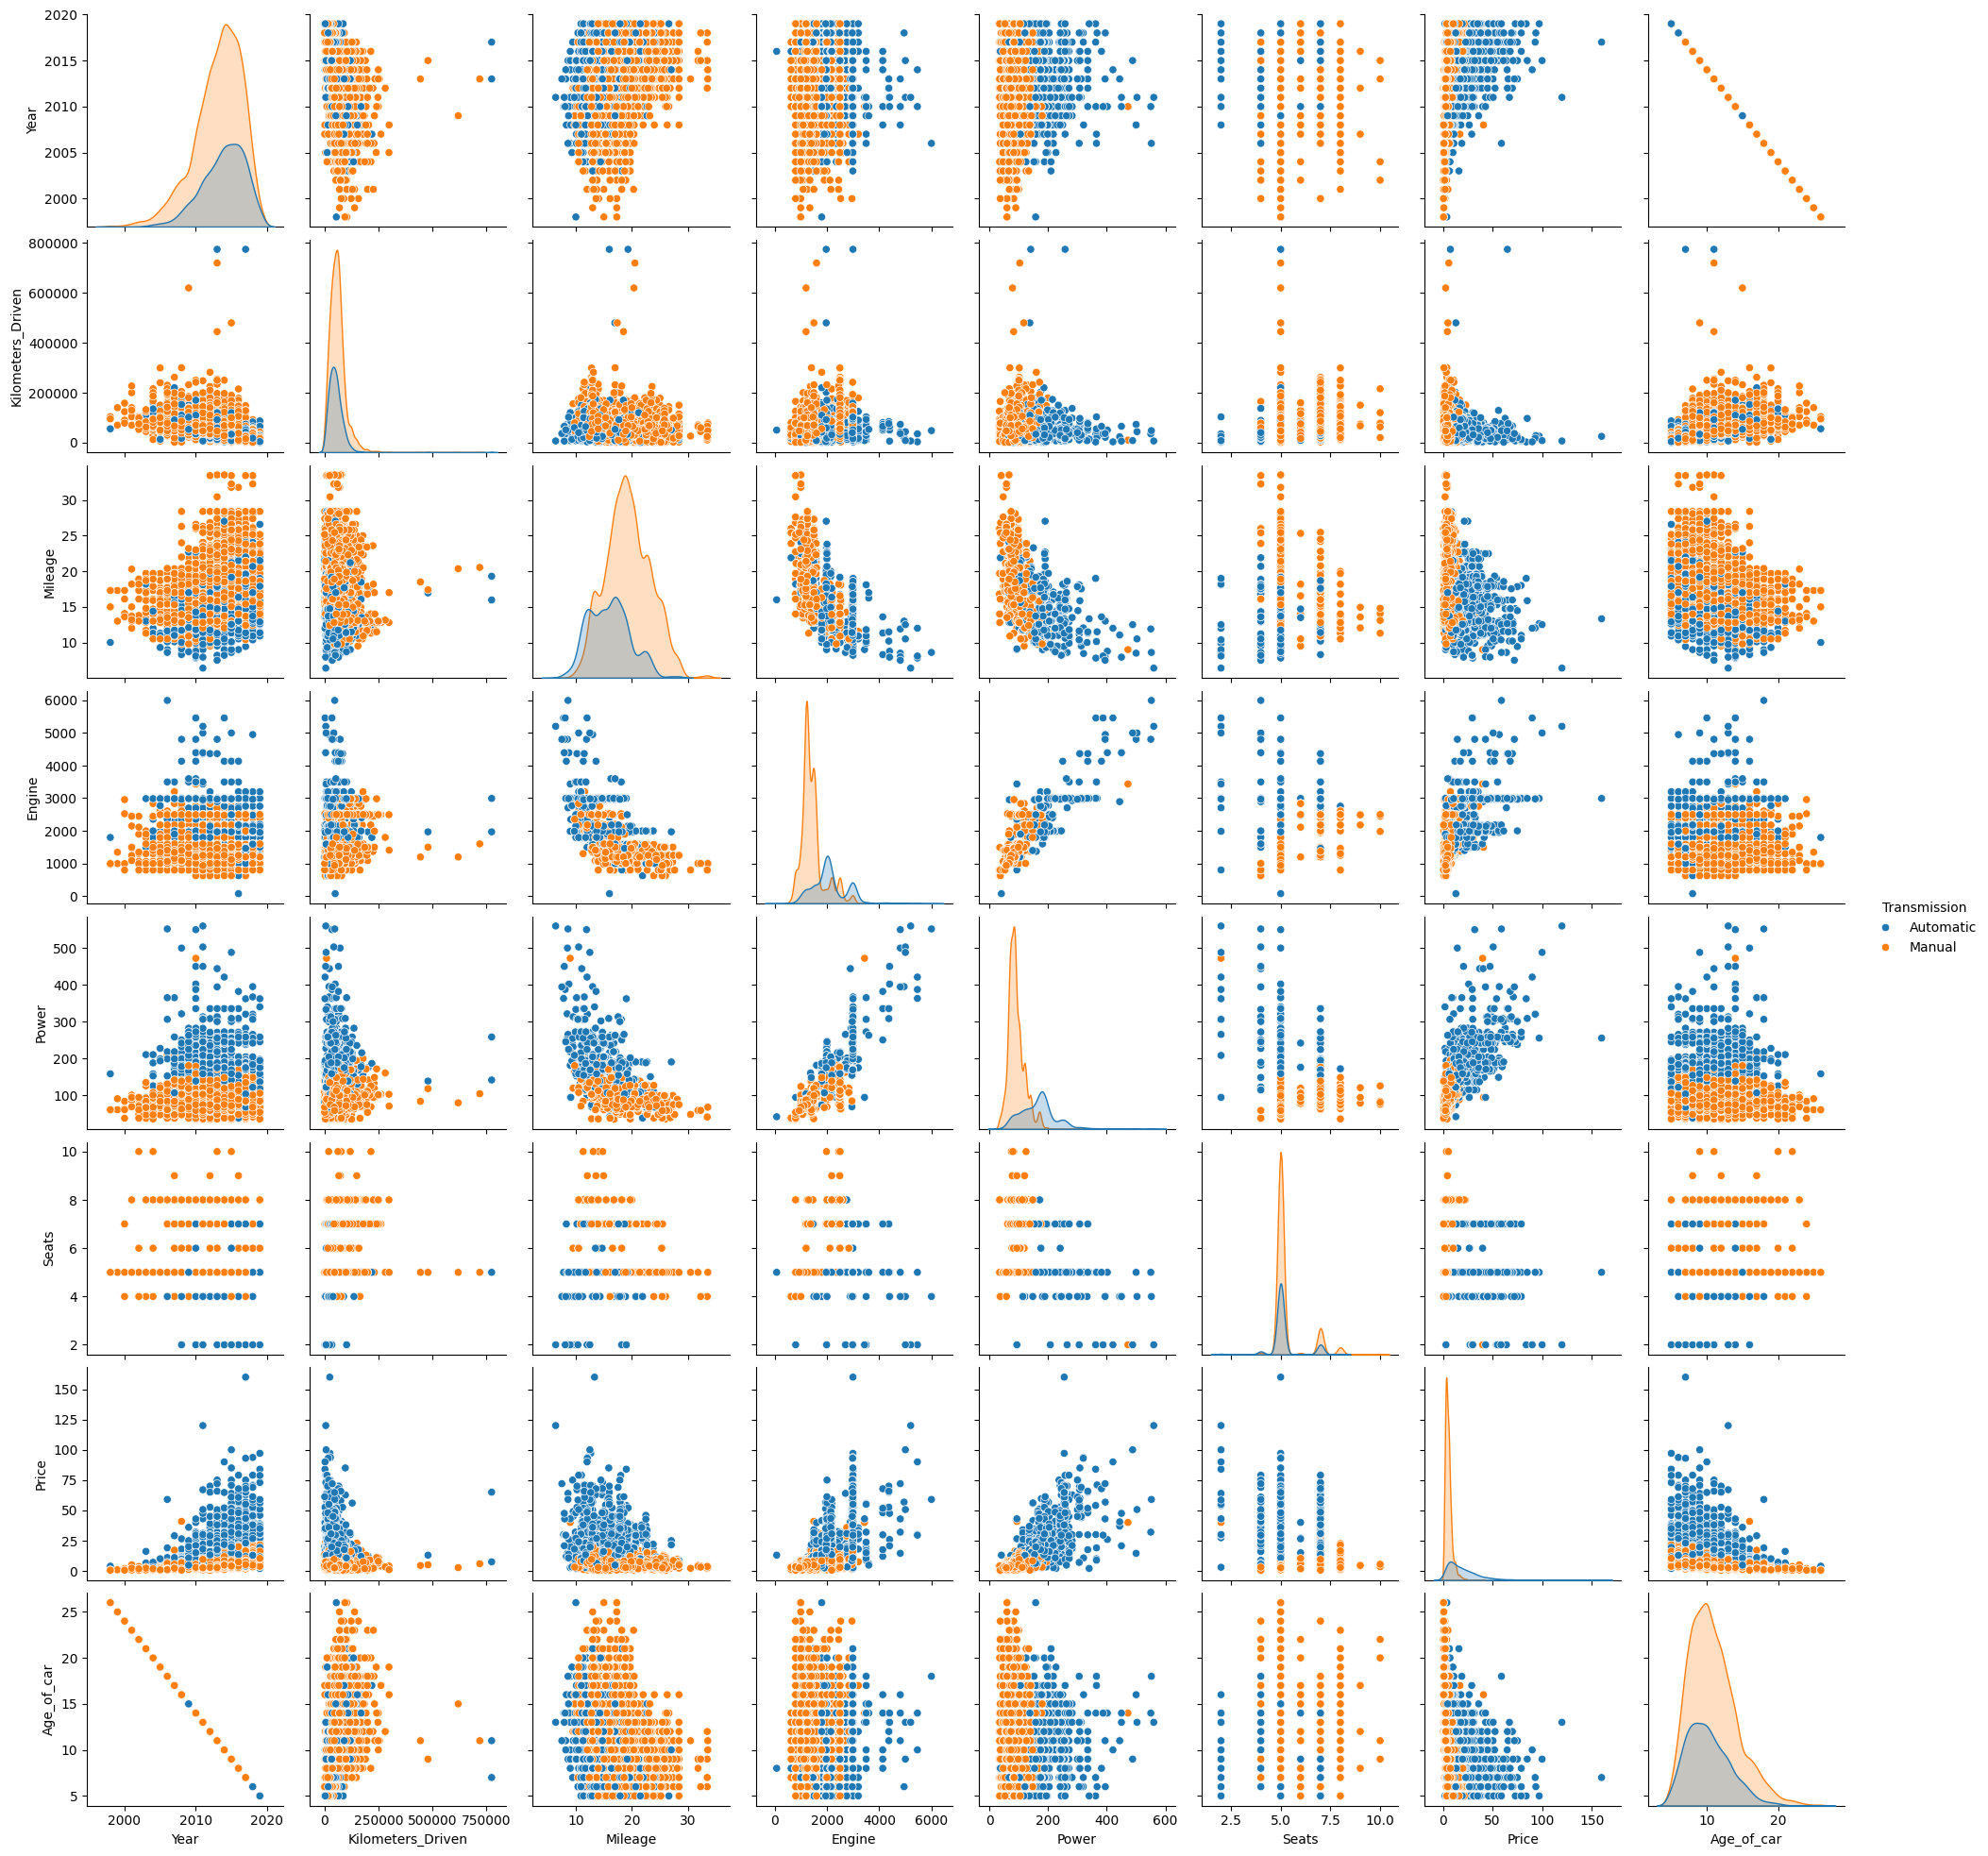

<Figure size 1400x1400 with 0 Axes>

In [113]:
cols_Pairplot = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price', 'Age_of_car', 'Transmission']
sns.pairplot(data[cols_Pairplot], hue = 'Transmission')
plt.figure(figsize = (14, 14))
plt.show()

2. Heatmap

Text(0.5, 1.0, 'Heatmap')

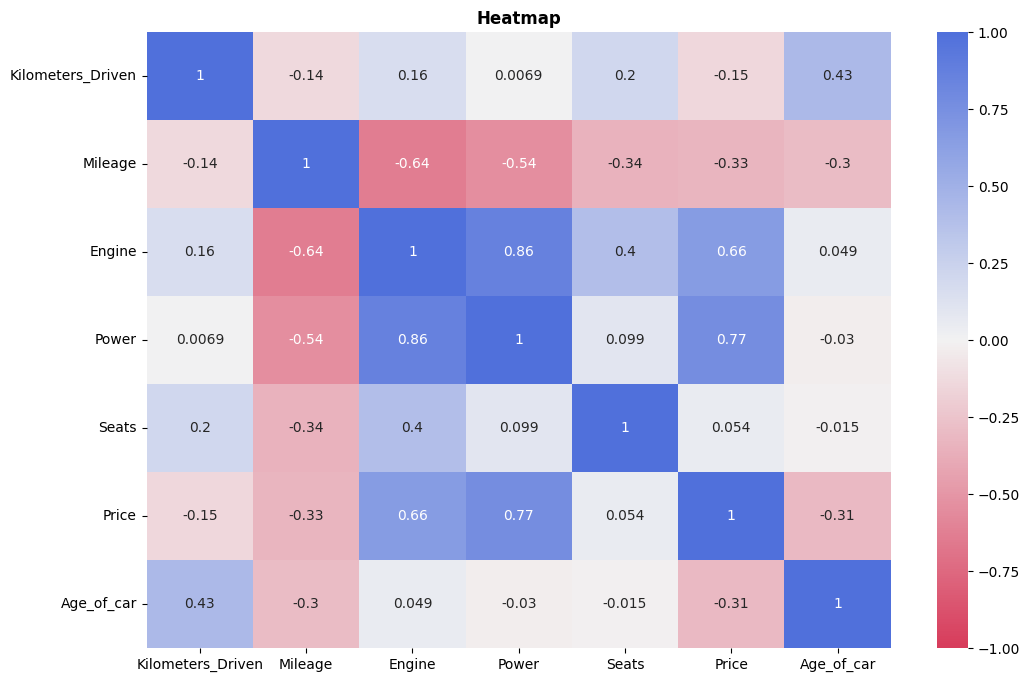

In [114]:
cols_Heatmap = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price', 'Age_of_car']
plt.figure(figsize = (12,8))
#create palette to show positive values in blue and negative values in red
cmap=sns.diverging_palette(5, 260, as_cmap=True)
#plot heatmap
sns.heatmap(data[cols_Heatmap].corr(), annot=True, cmap=cmap, vmin=-1, vmax=1)
plt.title('Heatmap', fontweight='bold')

From the above heatmap we can see that, positive correlation is observed between

- Engine - Power
- Engine - Price
- Power - Price
- Age_of_car - Kilometers_driven

Negative correlation between

- Power - Mileage
- Engine - Mileage

**Features Selection**

1. Deleting the features which are useless in dataset.

2. Find th relationship between continuous variables and target variable


Scatter plot

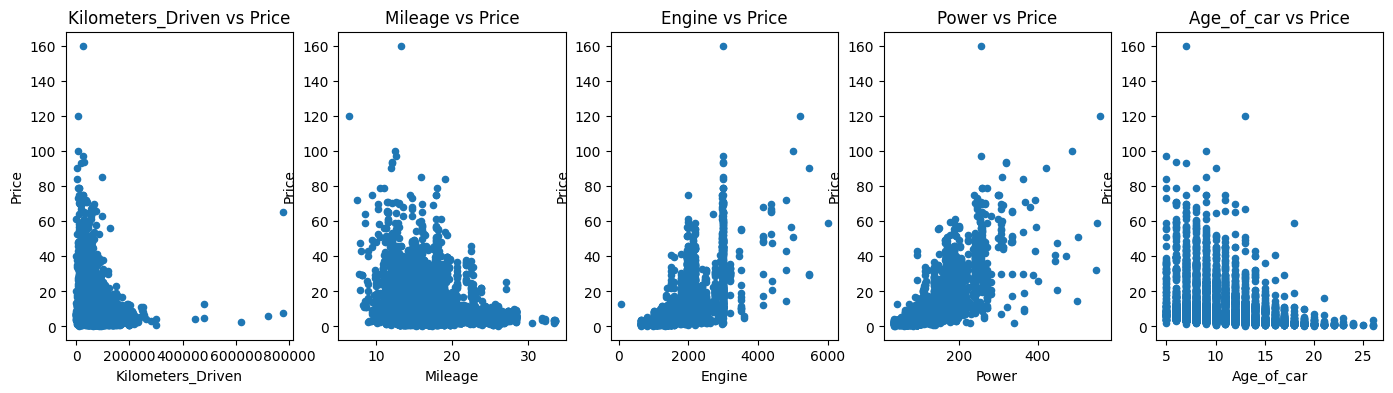

In [116]:
continuous_features = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Age_of_car']

fig, ax = plt.subplots(nrows = 1, ncols = len(continuous_features), figsize = (17,4))

for feature, i in zip(continuous_features, range(len(continuous_features))):
  data.plot.scatter(x = feature, y = 'Price', title = feature + ' vs ' + 'Price', ax = ax[i])

The scatter plot give an idea about how the 2 variables are correlated.

1. Increasing trend: When both variables are positively correlated. Menas they are directionaly proportional to each other. Increase in one variable cause increase in other variable.

2. Decreasing trend: When both varibles are negatively correlated.
Means they are inversely proportional to each other. Increase in one varible cause decrease in other variable.

3. No trend: We cannot see any clear increasing or decreasing trend. Means there is no any correlation between variables.



From the above graph we can see that,

Increasing trend: increasing trend between Price and engine and power.

Decreasing trend: decreasing trend between price and kilometers_driven, mileage, age_of_car.

 **We will confirm with this Pearson correlation coefficient.**

***Statistical measurement of relationship between continuous variable vs continuous target variable -- Pearson correlation coefficient***

1. correlation between (-1, 0) means variables are inversely proportional, the scatter plot show downword trend.

2. correlation between (0, 1) means are directly proportional, the scatter plot show upward trend.

3. correlation near to 0  means no relationship between variables, the scatter plot will show clear trend.

4. if correlation between two variables is > 0.5 magnitude, it indiactes good relationship and the sign does not matter.


H0 : there is no relationship between the given feature and target varible.

H1 : there is a relationship between the given feature and target variable.

Calculating Pearson's correlation coefficient for all the continuous features and selecting those whose coeffiecients are greater than 0.5

In [117]:
correlation_variables = ['Price', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Age_of_car']
correlation = data[correlation_variables].corr()
print(correlation)

                      Price  Kilometers_Driven   Mileage    Engine     Power  \
Price              1.000000          -0.147991 -0.331499  0.657521  0.770987   
Kilometers_Driven -0.147991           1.000000 -0.139857  0.156830  0.006864   
Mileage           -0.331499          -0.139857  1.000000 -0.639827 -0.543272   
Engine             0.657521           0.156830 -0.639827  1.000000  0.862245   
Power              0.770987           0.006864 -0.543272  0.862245  1.000000   
Age_of_car        -0.305327           0.432273 -0.296711  0.049345 -0.029562   

                   Age_of_car  
Price               -0.305327  
Kilometers_Driven    0.432273  
Mileage             -0.296711  
Engine               0.049345  
Power               -0.029562  
Age_of_car           1.000000  


In [118]:
# printing correlation between target variable and continuous features
continuous_features = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Age_of_car']

# creating empty list of selected features after ANOVA test
selected_features_pearson_correlation = [ ]

print("Pearson correlation coefficients\n")
for feature in continuous_features:
  print(feature)
  correlation_coeff = data['Price'].corr(data[feature])
  print('Pearsons correlation between Price and', feature, ':', correlation_coeff)
  print('Pearsons correlation absolute value between Price and ', feature, ':', abs(correlation_coeff))

  # if the correlation value > 0.3 then reject hypothesis i.e. H0.

  if (abs(correlation_coeff) > 0.3 ):
    print('Correlation between price and', feature, 'is greater than 0.3', feature, 'is correlated with price.\n')
    selected_features_pearson_correlation.append(feature)
  else:
    print('correlation between price and ', feature, 'is less than 0.3', feature, 'is not correlated with price.\n')

print('Selected features are: ', selected_features_pearson_correlation)

Pearson correlation coefficients

Kilometers_Driven
Pearsons correlation between Price and Kilometers_Driven : -0.1479912903887113
Pearsons correlation absolute value between Price and  Kilometers_Driven : 0.1479912903887113
correlation between price and  Kilometers_Driven is less than 0.3 Kilometers_Driven is not correlated with price.

Mileage
Pearsons correlation between Price and Mileage : -0.3314992294479024
Pearsons correlation absolute value between Price and  Mileage : 0.3314992294479024
Correlation between price and Mileage is greater than 0.3 Mileage is correlated with price.

Engine
Pearsons correlation between Price and Engine : 0.6575206980476338
Pearsons correlation absolute value between Price and  Engine : 0.6575206980476338
Correlation between price and Engine is greater than 0.3 Engine is correlated with price.

Power
Pearsons correlation between Price and Power : 0.770986502978132
Pearsons correlation absolute value between Price and  Power : 0.770986502978132
Correl

From the above result we can see that, all the continuous variables except Kilometers_Driven are correlated with price of the car. There is no caorrelation between Kilometers_Driven and price of the car.

Hence Kilometers_Driven may affect the Price of the car.
So Kilometers_Driven kept for analysis.

**Find the relationship between categorical features and continuous target variable.**

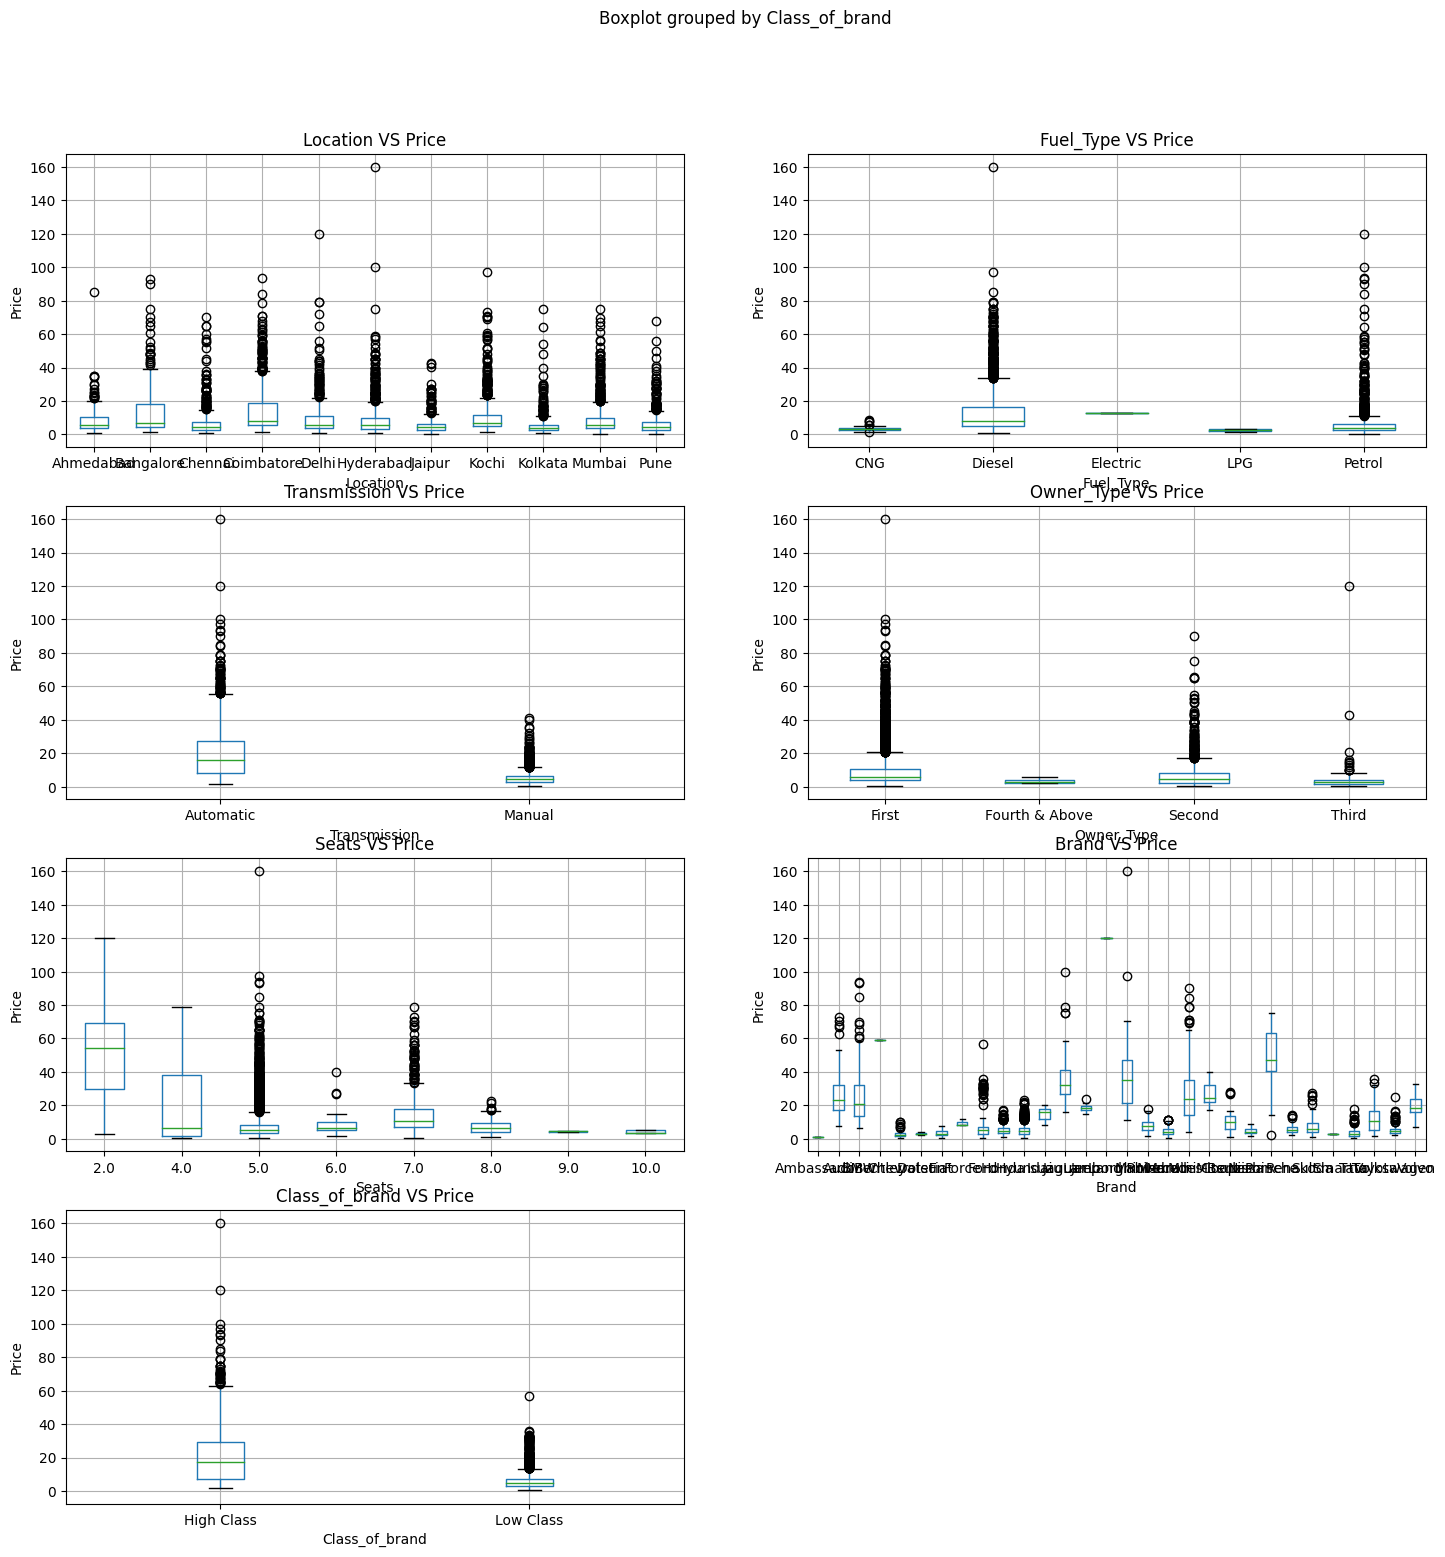

In [119]:
categorical_features = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats', 'Brand','Class_of_brand']
fig = plt.figure(figsize = (17, 18))
plt.xticks(rotation = 90)
for feature, i in zip(categorical_features, range(7)):
  ax = plt.subplot(4, 2, i+1)
  plot = data.boxplot(column = 'Price', by = feature, ax = ax)

  plot.set_title(feature + ' VS ' + 'Price')
  plot.set_xlabel(feature)
  plot.set_ylabel('Price')


From the above graphs we can see that, they give an idea about distribution of continuous target variable in Y-axis and each category is the x-axis.

If the distribution is similar for each category i.e. when boxes are in the same line, then it means the categorical feature has NO effect on continuous target.

In the plots the boxes are not in the same line, indicating that these features are correlated with 'Price'.

**We will confirm this with the help of ANOVA test **

Statistical measurement of relationship between continuous target varible and categorical variables by using ANOVA test.

In [120]:
# define function for ANOVA test
from scipy.stats import f_oneway
def ANOVA_test(Data, categorical_features, Target_var):

  # create empty list of selected features after ANOVA test
  global selected_features_ANOVA
  selected_features_ANOVA = [ ]

  print('Anova Result\n')
  for feature in categorical_features:
    categorywise_feature_list = Data.groupby(feature)[Target_var] .apply(list)
    Anova_result = f_oneway(*categorywise_feature_list)


    # if the p-value is < 0.05, we will reject null hpothesis
    if (Anova_result[1] < 0.05):
      print('p-value is : ', Anova_result[1], 'is less than 0.05', feature, 'is correlated with ', Target_var)
      selected_features_ANOVA.append(feature)
    else:
      print('p-value is : ', Anova_result[1], 'is greater than 0.05', feature, 'is not correlated with ', Target_var)
  print('\n\n Selected Features are: ', selected_features_ANOVA)

ANOVA_test(Data = data, categorical_features = categorical_features, Target_var = 'Price')

Anova Result

p-value is :  4.657735638119322e-77 is less than 0.05 Location is correlated with  Price
p-value is :  8.146026879615981e-141 is less than 0.05 Fuel_Type is correlated with  Price
p-value is :  0.0 is less than 0.05 Transmission is correlated with  Price
p-value is :  1.9349311196976507e-12 is less than 0.05 Owner_Type is correlated with  Price
p-value is :  4.443290167031985e-125 is less than 0.05 Seats is correlated with  Price
p-value is :  0.0 is less than 0.05 Brand is correlated with  Price
p-value is :  0.0 is less than 0.05 Class_of_brand is correlated with  Price


 Selected Features are:  ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats', 'Brand', 'Class_of_brand']


From the above resilt and boxplot we can see that all the variables are correlated with price.

**Selecting final columns or features for training machine learning model**

In [121]:
selected_features = selected_features_pearson_correlation + selected_features_ANOVA
selected_features

['Mileage',
 'Engine',
 'Power',
 'Age_of_car',
 'Location',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Seats',
 'Brand',
 'Class_of_brand']

In [122]:
selected_features_columns = ['Kilometers_Driven'] + selected_features + ['Price']
final_data_for_ML = data[selected_features_columns]
final_data_for_ML.head()

,Kilometers_Driven,Mileage,Engine,Power,Age_of_car,Location,Fuel_Type,Transmission,Owner_Type,Seats,Brand,Class_of_brand,Price
0,72000,26.60,998.0,58.16,14,Mumbai,CNG,Manual,First,5.0,Maruti,Low Class,1.75
1,41000,19.67,1582.0,126.20,9,Pune,Diesel,Manual,First,5.0,Hyundai,Low Class,12.50
2,46000,18.20,1199.0,88.70,13,Chennai,Petrol,Manual,First,5.0,Honda,Low Class,4.50
3,87000,20.77,1248.0,88.76,12,Chennai,Diesel,Manual,First,7.0,Maruti,Low Class,6.00
4,40670,15.20,1968.0,140.80,11,Coimbatore,Diesel,Automatic,Second,5.0,Audi,High Class,17.74


**Data Transformation: Encoding**

In [123]:
final_data_for_ML = pd.get_dummies(final_data_for_ML, columns = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand', 'Class_of_brand'],
                                   drop_first = True)
final_data_for_ML.head()

,Kilometers_Driven,Mileage,Engine,Power,Age_of_car,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Class_of_brand_Low Class
0,72000,26.60,998.0,58.16,14,5.0,1.75,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,41000,19.67,1582.0,126.20,9,5.0,12.50,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,46000,18.20,1199.0,88.70,13,5.0,4.50,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,87000,20.77,1248.0,88.76,12,7.0,6.00,False,True,False,...,False,False,False,False,False,False,False,False,False,True
4,40670,15.20,1968.0,140.80,11,5.0,17.74,False,False,True,...,False,False,False,False,False,False,False,False,False,False


**Feature Importance**

Separate target variable

In [124]:
a = final_data_for_ML.drop(['Price'], axis = 1)
b = final_data_for_ML['Price']

Calculating and plotting feature importance

In [125]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state = 42)
model.fit(a, b)

DecisionTreeRegressor(random_state=42)

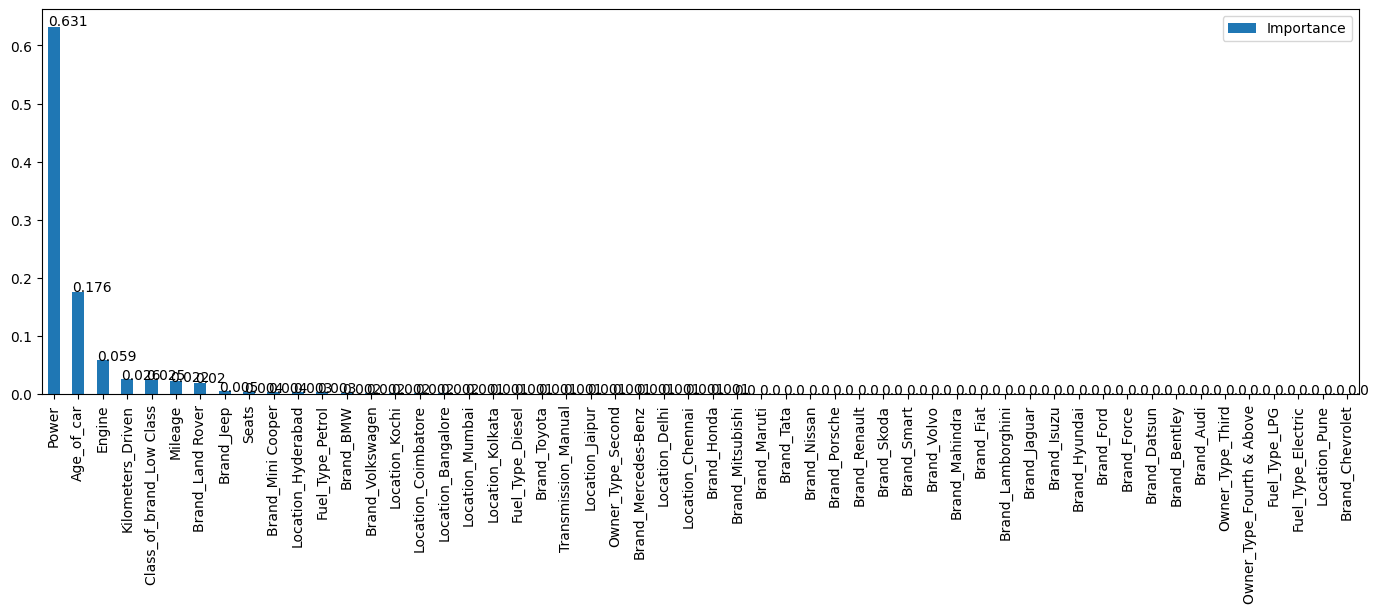

,Importance
Power,0.631
Age_of_car,0.176
Engine,0.059
Kilometers_Driven,0.026
Class_of_brand_Low Class,0.025
Mileage,0.022
Brand_Land Rover,0.020
Brand_Jeep,0.005
Seats,0.004
Brand_Mini Cooper,0.004


In [126]:
fit_importances = pd.DataFrame(np.around(list(model.feature_importances_), 3), index = a.columns, columns = ['Importance'])
fit_importances.sort_values(by = 'Importance', ascending = False, inplace = True)
ax = fit_importances.plot(kind = 'bar', figsize = (17,5))

for p in ax.patches:
  ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()
fit_importances

**Power, age_of_car, engine, kilometers_driven, class_of_brand, mileage, brand-land rover, seats of the car are the most important features in determining price of the car.**

**Model Building**

In [127]:
# Separate data into features and target
features = final_data_for_ML.drop(['Price'], axis = 1)
target = final_data_for_ML['Price']

In [128]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)

In [129]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4213, 54)
(1806, 54)
(4213,)
(1806,)


In [130]:
X_train.head()

,Kilometers_Driven,Mileage,Engine,Power,Age_of_car,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Class_of_brand_Low Class
4201,77000,22.07,1199.0,73.9,13,5.0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4383,19947,20.36,1197.0,78.9,8,5.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1779,70963,15.10,2179.0,140.0,10,7.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4020,115195,25.20,1248.0,74.0,11,5.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3248,58752,16.47,1198.0,73.9,13,5.0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [131]:
# Scaling of train data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [132]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train_scaled = pd.DataFrame(X_train, columns = features.columns)
X_train_scaled.head()

,Kilometers_Driven,Mileage,Engine,Power,Age_of_car,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Class_of_brand_Low Class
0,0.098657,0.577377,0.209130,0.075504,0.380952,0.375,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.024983,0.514370,0.208759,0.085013,0.142857,0.375,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.090861,0.320560,0.390982,0.201217,0.238095,0.625,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.147979,0.692704,0.218222,0.075694,0.285714,0.375,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.075093,0.371039,0.208944,0.075504,0.380952,0.375,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


**1. Linear regression**

In [133]:
from sklearn.linear_model import LinearRegression

In [134]:
lr = LinearRegression()

In [135]:
lr.fit(X_train, y_train)

LinearRegression()

In [136]:
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

In [137]:
# Evaluation of metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

evaluation_df = pd.DataFrame({'Model': ['Linear Regression', 'Linear Regression'],
                              'Data': ['Train', 'Test'],
                              'MDE' : [mean_squared_error(y_train, pred_train), mean_squared_error(y_test, pred_test)],
                              'RMSE' : [np.sqrt(mean_squared_error(y_train, pred_train)), np.sqrt(mean_squared_error(y_test, pred_test))],
                              'MAE' : [mean_absolute_error(y_train, pred_train), mean_absolute_error(y_test, pred_test)],
                              'R^2 score' : [r2_score(y_train, pred_train), r2_score(y_test, pred_test)],
                              'Accuracy' : [lr.score(X_train, y_train), lr.score(X_test, y_test)]})
evaluation_df

,Model,Data,MDE,RMSE,MAE,R^2 score,Accuracy
0,Linear Regression,Train,27.366331,5.231284,2.849867,0.782927,0.782927
1,Linear Regression,Test,30.628849,5.534334,3.109994,0.750982,0.750982


**2. Feed forward neural network**

Here we are creating neural network using Tensorflow and keras.

To train a feed forward neural network first we have to create input class that define the input layer

In [138]:
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model

Next, we can add many dense layer as you want. Here we are add 6 dense layers with 100, 50, 25, 10, 5, 2 nodes for each layer. For first dense layer is the output from the input layer.
The output layer consists of dense layer with node 1 because we are predicting a single value.

In [139]:
input_layer = Input(shape = features.shape[1], )
dense_layer0 = Dense(100, activation = 'relu')(input_layer)
dense_layer1 = Dense(50, activation = 'relu')(dense_layer0)
dense_layer2 = Dense(25, activation = 'relu')(dense_layer1)
dense_layer3 = Dense(10, activation = 'relu')(dense_layer2)
dense_layer4 = Dense(5, activation = 'relu')(dense_layer3)
dense_layer5 = Dense(2, activation = 'relu')(dense_layer4)

output = Dense(1)(dense_layer5)

To compile the model, you use compile() function and then specify the loss function, optimizer, metrics. Here we use loss function is mean_absolute_error, optimizer is adam, and metrics is also mean_absolute_error we are evaluating regression problem.

In [140]:
model = Model(inputs = input_layer, outputs = output)
model.compile(loss = 'mean_absolute_error', optimizer = 'adam', metrics = ['mean_absolute_error'])

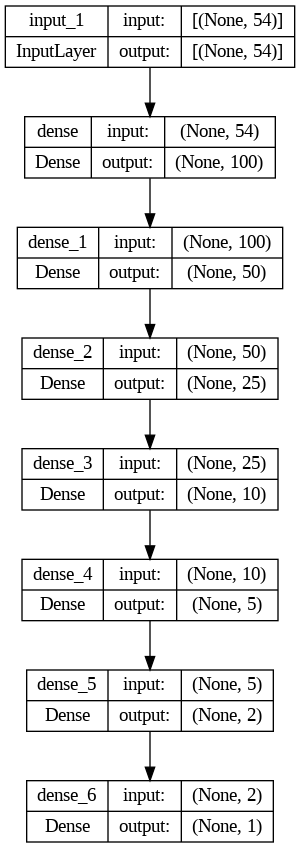

In [141]:
from keras.utils import plot_model
plot_model(model, to_file = 'model_plot.png', show_shapes = True, show_layer_names = True)

In [145]:
# train model
history = model.fit(X_train, y_train, batch_size = 5, epochs = 5, verbose = 1, validation_split = 0.2)

Epoch 1/5
674/674 [==============================] - 8s 5ms/step - loss: 3.7678 - mean_absolute_error: 3.7678 - val_loss: 2.5782 - val_mean_absolute_error: 2.5782
Epoch 2/5
674/674 [==============================] - 2s 2ms/step - loss: 2.0294 - mean_absolute_error: 2.0294 - val_loss: 2.3159 - val_mean_absolute_error: 2.3159
Epoch 3/5
674/674 [==============================] - 2s 3ms/step - loss: 1.7768 - mean_absolute_error: 1.7768 - val_loss: 2.1354 - val_mean_absolute_error: 2.1354
Epoch 4/5
674/674 [==============================] - 2s 3ms/step - loss: 1.6917 - mean_absolute_error: 1.6917 - val_loss: 2.0551 - val_mean_absolute_error: 2.0551
Epoch 5/5
674/674 [==============================] - 2s 2ms/step - loss: 1.6543 - mean_absolute_error: 1.6543 - val_loss: 1.8120 - val_mean_absolute_error: 1.8120


**Evaluation of model:**

To make predictions on the test set and then use regression metrics such as MSE, RMSE, MAE to evaluate model performance.

In [146]:
y_pred = model.predict(X_test)

57/57 [==============================] - 0s 3ms/step


In [153]:
print('Mean Squared error : ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared error : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean Absolute error : ', mean_absolute_error(y_test, y_pred))
print('Accuracy : ', r2_score(y_test, y_pred))

Mean Squared error :  17.777439638923465
Root Mean Squared error :  4.216330115031728
Mean Absolute error :  1.8042478971082638
Accuracy :  0.8554664028901824


The above output shows that the mean error is 1.80.

The mean of the Price column is

In [149]:
data['Price'].mean()

9.47946835022429

Find mean percentage error by dividing MAE by the average of the Price column 1.80/9.47 = 0.190 . This value show that, on average for all the
cars in the test set, the prices predicted by our feedforward neural network and the
actual prices differ by 19.0 percent.

In [151]:
# find differences in actual and predicted values
comparison_df = pd.DataFrame({'Actual' : y_test.values.tolist(), 'Predicted' : y_pred.tolist() })
comparison_df

,Actual,Predicted
0,5.75,[4.559472560882568]
1,10.08,[9.17273998260498]
2,7.85,[7.701624393463135]
3,2.40,[3.609349250793457]
4,1.60,[1.982839584350586]
...,...,...
1801,9.47,[9.887539863586426]
1802,3.20,[3.2674660682678223]
1803,4.25,[2.9483513832092285]
1804,6.48,[6.55653715133667]


Making prediction on single column

In [154]:
X_test[1].shape

(54,)

1, to make predictions on a single record, the feature vector for
the record should be in the form of a row vector. You can covert the feature vector for a single record into the row vector using the reshape(1,–1) method.

In [155]:
single_point = X_test[1].reshape(1, -1)
single_point.shape

(1, 54)

To make predictions, you simply have to pass the row feature vector to the predict() method of the trained neural network model

In [156]:
model.predict(X_test[1].reshape(1,-1))

1/1 [==============================] - 0s 115ms/step


array([[9.172739]], dtype=float32)

The predicted price is 9.17 hundred thousand

In [157]:
y_test.values[1]

10.08

**The actual output is 10.08 hundred thousand, which is very close to the 9.17 hundred thousand predicted by our model.**